# Comparing LSTM ensembles trained with varying degrees of 

Rappjer1@gmail.com, Jeremy Rapp, 11/25/2023  
Follow on to NOAA summer institute 2023 work for AGU 2023 and   




In [2]:

# Comparing the performance of the ensembles and non-ensembled lstm \n using various attributes or PC'set

# Location of LSTM ensembles and non-ensembled models
loc = 'E:\\LSTM_for_NextGen_results\\'

nonEnsemble = loc+'LSTM_for_NextGen_attributes_results_nonEnsemble\\'
ensemble5 = loc+'LSTM_for_NextGen_attributes_results_5_ensembles\\'
ensembles6 = loc+'LSTM_for_NextGen_attributes_results_6_ensembles\\'
ensembles7 = loc+'LSTM_for_NextGen_attributes_results_7_ensembles\\'
ensembles7_all = loc+'LSTM_for_NextGen_attributes_HA_all_7_ensembles\\'


In [19]:
# Visualizing indivudal performance per category of LSTM


# Training a number of LSTM models to get over equifinality 


# Opening the stats and pickle file for NoahMP
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Opening the stats and pickle file for NoahMP
dict_og = pd.read_pickle(ensembles7+'PC200_ensemble\\'+'test_ensemble_results.p')
print(dict_og.keys())
#write the dictionary keys to a text file, with each key on a new line in column basin_id
# with open(ensembles7+'CAMELS_basins_keys.txt', 'w') as f:
#     for key in dict_og.keys():
#         f.write("%s\n" % key)

# Turn the keys into a list of integers
# keys = list(dict_og.keys())
# keys = [int(i) for i in keys]
# print(keys)


#print(dict_og['01047000'])


dict_keys(['01047000', '01052500', '01123000', '01134500', '01139800', '01411300', '01414500', '01435000', '01451800', '01510000', '01518862', '01544500', '01545600', '01567500', '01568000', '01586610', '01591400', '01639500', '01669520', '02014000', '02027000', '02027500', '02051500', '02056900', '02065500', '02070000', '02077200', '02081500', '02111500', '02118500', '02125000', '02177000', '02178400', '02212600', '02245500', '02246000', '02297310', '02298123', '02298608', '02342933', '02384540', '02464000', '03015500', '03049000', '03050000', '03070500', '03076600', '03173000', '03182500', '03186500', '03281500', '03366500', '03384450', '03455500', '03456500', '03463300', '03479000', '03504000', '03592718', '04015330', '04027000', '04045500', '04057510', '04057800', '04105700', '04161580', '04197170', '04221000', '04256000', '05291000', '05393500', '05454000', '05489000', '05591550', '05592050', '05593575', '05593900', '06339100', '06404000', '06406000', '06409000', '06477500', '0647

defaultdict(<class 'dict'>, {'1D': {'NSE': -1.165459156036377, 'MSE': 0.4836803376674652, 'KGE': 0.33800106048448386, 'xr': <xarray.Dataset>
Dimensions:         (datetime: 1826)
Coordinates:
  * datetime        (datetime) datetime64[ns] 2009-10-01 ... 2014-09-30
Data variables:
    QObs(mm/d)_obs  (datetime) float32 1.093 1.531 1.579 ... 0.7288 0.7288
    QObs(mm/d)_sim  (datetime) float32 0.4738 1.111 0.9471 ... 0.145 0.1823}})


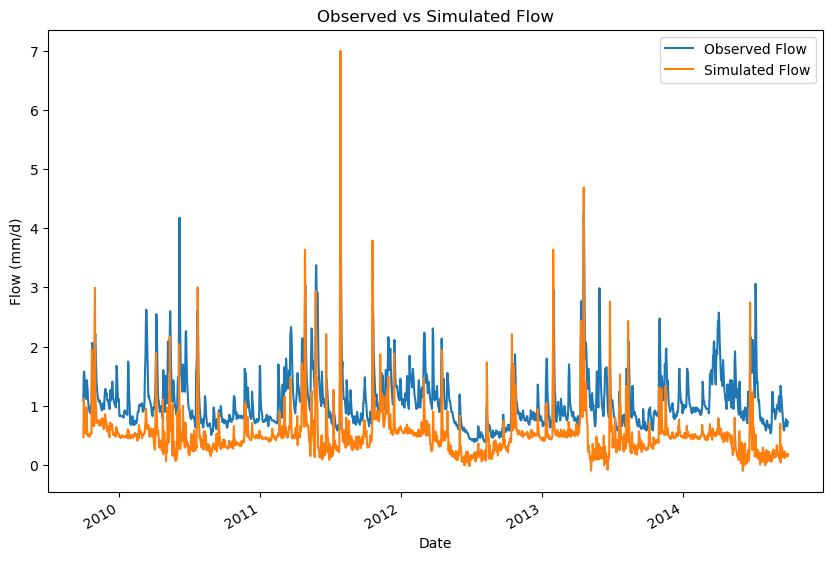

In [20]:

#Taquamonon
# xr_dataset = dict_og['04045500']

#Augusta
xr_dataset = dict_og['04105700']
print(xr_dataset)

xr_data = xr_dataset['1D']['xr']

obs = xr_data['QObs(mm/d)_obs']
sim = xr_data['QObs(mm/d)_sim']


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
obs.plot(label='Observed Flow')
sim.plot(label='Simulated Flow')
plt.title('Observed vs Simulated Flow')
plt.xlabel('Date')
plt.ylabel('Flow (mm/d)')
plt.legend()
plt.show()


#Pick a small section of the hydrograph, and highlight about a month
#Noah-MP parameters, discussion about the parameters, where they come from, and how they are used


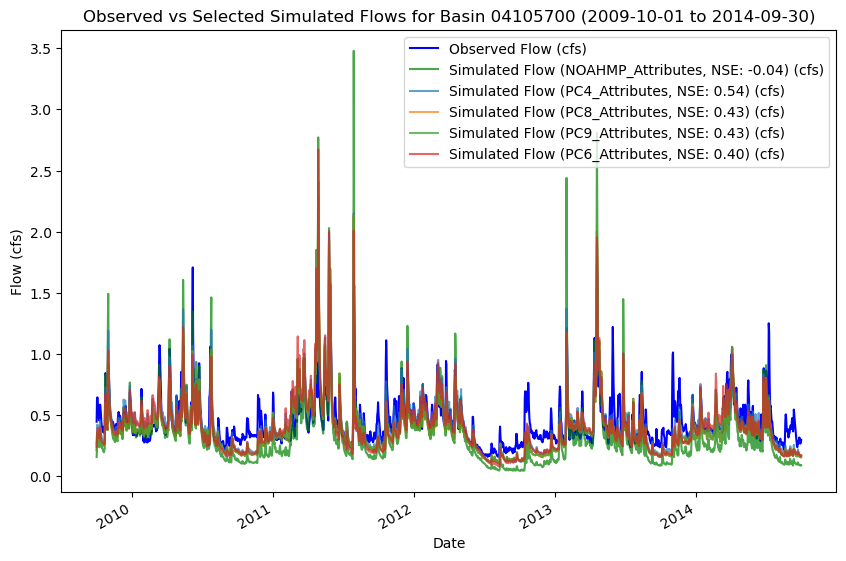

In [4]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
from collections import defaultdict

def plot_flow(ensembles7_path, specific_basin_id, selection_type, num_plots, area_sq_meters, startDate, endDate):
    # Conversion factors
    mm_d_to_m3_s = area_sq_meters / (1000 * 86400)  # mm/d to m³/s
    m3_s_to_cfs = 35.3147  # m³ to ft³

    # Initialize a dictionary to store simulated data and their NSE values
    sim_data_nse = defaultdict(list)

    # Special folder to always include
    special_folder = 'NOAHMP_Attributes'
    special_sim = None
    special_folder_name = None
    special_nse = None

    # Flag to track if observed data is extracted
    obs_extracted = False

    # Iterate through each subfolder in the ensembles7 directory
    for subdir, dirs, files in os.walk(ensembles7_path):
        for file in files:
            if file.endswith('.p'):
                # Construct the full file path
                file_path = os.path.join(subdir, file)

                # Load the pickle file
                data_dict = pd.read_pickle(file_path)

                if specific_basin_id in data_dict:
                    xr_dataset = data_dict[specific_basin_id]
                    xr_data = xr_dataset['1D']['xr']
                    nse = xr_dataset['1D']['NSE']

                    if not obs_extracted:
                        # Extract observed data once and convert units
                        obs = xr_data['QObs(mm/d)_obs'] * mm_d_to_m3_s * m3_s_to_cfs
                        # Filter data for the specified date range
                        obs = obs.sel(datetime=slice(startDate, endDate))
                        obs_extracted = True

                    # Extract simulated data and convert units
                    sim = xr_data['QObs(mm/d)_sim'] * mm_d_to_m3_s * m3_s_to_cfs
                    sim = sim.sel(datetime=slice(startDate, endDate))

                    folder_name = os.path.basename(subdir)
                    if folder_name == special_folder:
                        special_sim = sim
                        special_folder_name = folder_name
                        special_nse = nse
                    else:
                        # Store simulated data and NSE for other folders
                        sim_data_nse[nse].append((sim, folder_name))

    # Select simulations based on NSE
    selected_simulations = []
    if selection_type == 'best':
        selected_simulations = sorted(sim_data_nse.items(), reverse=True)[:num_plots]
    elif selection_type == 'worst':
        selected_simulations = sorted(sim_data_nse.items())[:num_plots]
    elif selection_type == 'random':
        selected_simulations = np.random.choice(list(sim_data_nse.items()), num_plots, replace=False)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot observed data
    obs.plot(label='Observed Flow (cfs)', color='blue')

    # Plot special simulation
    if special_sim is not None:
        special_sim.plot(label=f'Simulated Flow ({special_folder_name}, NSE: {special_nse:.2f}) (cfs)', alpha=0.7, color='green')

    # Plot selected simulated series
    for nse_value, sims in selected_simulations:
        for sim, folder_name in sims:
            if folder_name != special_folder_name:  # Avoid plotting the special folder again
                sim.plot(label=f'Simulated Flow ({folder_name}, NSE: {nse_value:.2f}) (cfs)', alpha=0.7)

    plt.title(f'Observed vs Selected Simulated Flows for Basin {specific_basin_id} ({startDate} to {endDate})')
    plt.xlabel('Date')
    plt.ylabel('Flow (cfs)')
    plt.legend()
    plt.show()

# Example usage of the function
plot_flow(
    ensembles7_path= ensembles7,  # Replace with your actual path
    specific_basin_id='04105700',          # The basin ID you are interested in
    selection_type='best',                 # 'best', 'worst', or 'random'
    num_plots=3,                           # Number of plots to display
    area_sq_meters=1000000,                # Area in square meters
    startDate='2009-10-01',                # Start date
    endDate='2014-09-30'                   # End date
)

#No calibration needed, so ungauged meaning out of sample in space for
#

C:\Users\Rappj\AppData\Local\Temp\ipykernel_50324\4055785562.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pc_color_palette = plt.cm.get_cmap('winter')


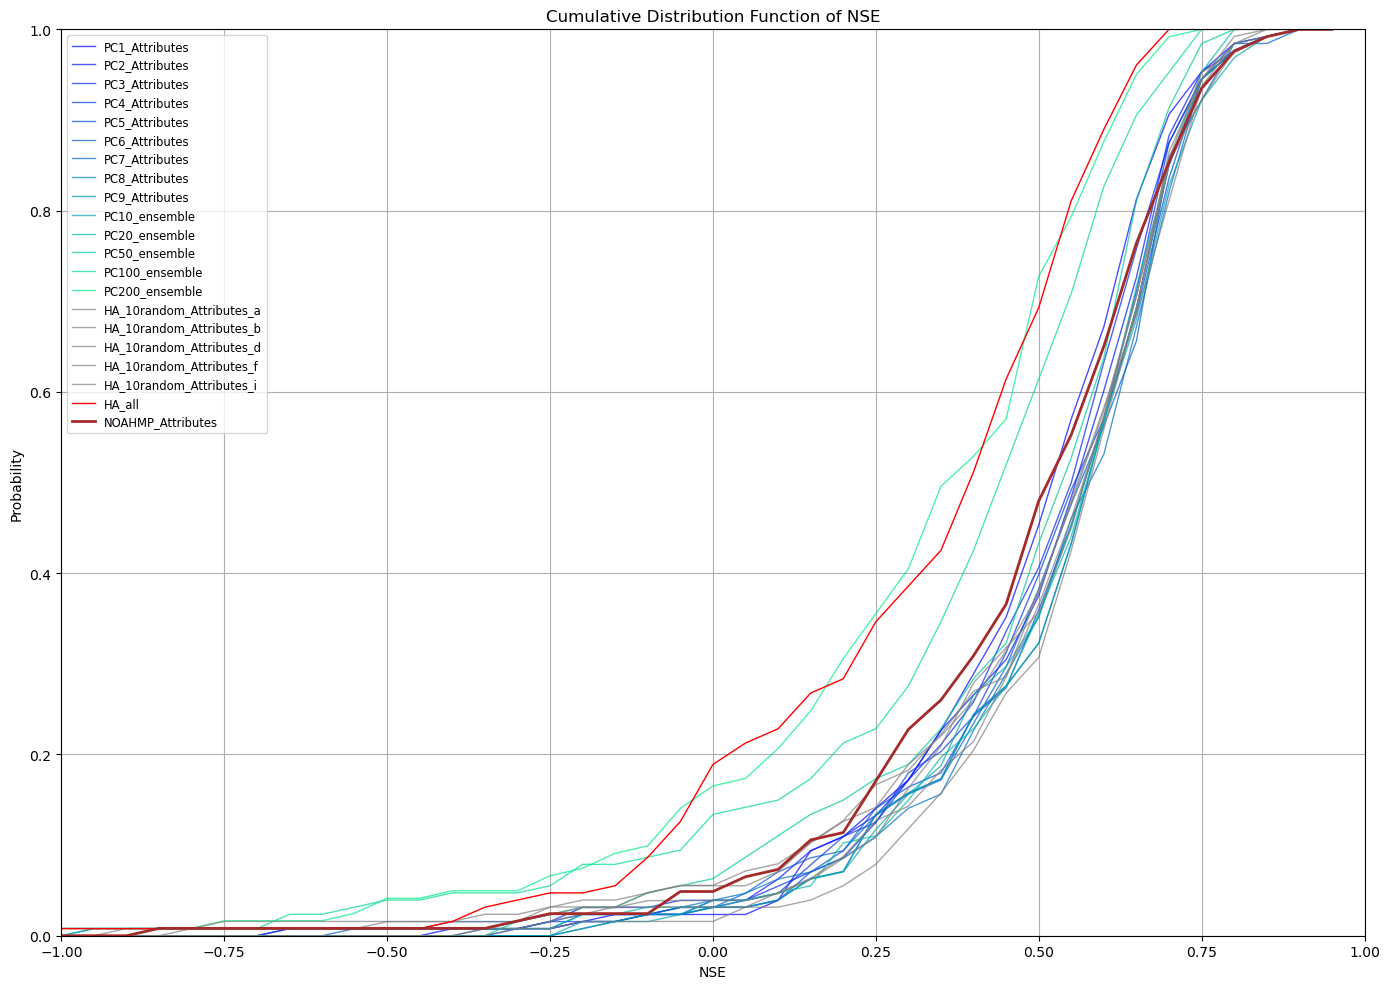

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import re

def get_folder_names(directory):
    folder_names = []
    for folder in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, folder)):
            folder_names.append(folder)
    return folder_names


# Function to load dataframes from folders
def load_dataframes_from_folders(base_directory, folder_names, file_name):
    dataframes = []
    dataframe_names = []  # List to store the names
    for folder in folder_names:
        file_path = os.path.join(base_directory, folder, file_name)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            dataframes.append(df)
            dataframe_names.append(folder)  # Store the folder name as the dataframe name
    return dataframes, dataframe_names

def plot_cdf(dataframes, dataframe_names, column, x_min, x_max):
    plt.figure(figsize=(14, 10))  # Increased figure size for better display

    # Create a color palette that transitions from blue to green
    pc_color_palette = plt.cm.get_cmap('winter')

    # Custom sorting key for "PC" dataframes
    def get_pc_number(name):
        match = re.search(r'PC(\d+)', name)
        return int(match.group(1)) if match else float('inf')

    # Sort the dataframe names using the custom key
    sorted_tuples = sorted(zip(dataframe_names, dataframes), key=lambda x: get_pc_number(x[0]))
    sorted_dataframe_names, sorted_dataframes = zip(*sorted_tuples)

    # Calculate the number of "PC" dataframes for color scaling
    pc_count = sum('PC' in name for name in dataframe_names)
    
    legend_handles = []  # List to keep track of legend handles

    for i, (df, name) in enumerate(zip(sorted_dataframes, sorted_dataframe_names)):
        # Drop NaN values from the column
        cleaned_data = df[column].dropna()
        
        # Calculate histogram and cumulative distribution
        values, base = np.histogram(cleaned_data, bins=40, range=(x_min, x_max), density=True)
        cumulative = np.cumsum(values) / np.cumsum(values)[-1]

        # Assign color and style based on dataframe name
        if "HA_10random" in name:
            color = 'grey'
            alpha = 0.7
            linewidth = 1
        elif "PC" in name:
            color = pc_color_palette(i / pc_count)  # Scale color based on index
            alpha = 0.7
            linewidth = 1
        elif "HA_all" in name:
            color = 'red'
            alpha = 1.0
            linewidth = 1
        elif "NOAHMP" in name:
            color = 'brown'
            alpha = 1.0
            linewidth = 2  # Bold line for NOAHMP
        else:
            color = 'grey'  # Default color for other dataframes
            alpha = 1.0
            linewidth = 1

        # Plot the line and add to legend handles
        line, = plt.plot(base[:-1], cumulative, label=name, color=color, alpha=alpha, linewidth=linewidth)
        legend_handles.append(line)

    plt.title(f'Cumulative Distribution Function of {column}')
    plt.xlim(x_min, x_max)
    plt.ylim(0, 1)
    plt.xlabel(column)
    plt.ylabel('Probability')

    # Create the legend with the handles
    plt.legend(handles=legend_handles, loc='best', fontsize='small')

    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Example usage
base_directory = ensembles7  # Replace with your base directory path
file_name = 'test_ensemble_metrics.csv'
ensemble_folders = get_folder_names(base_directory)  # Assuming get_folder_names function is defined
dataframes, dataframe_names = load_dataframes_from_folders(base_directory, ensemble_folders, file_name)

# Now you can use plot_cdf function with these dataframes and their names
plot_cdf(dataframes, dataframe_names, 'NSE', -1, 1)


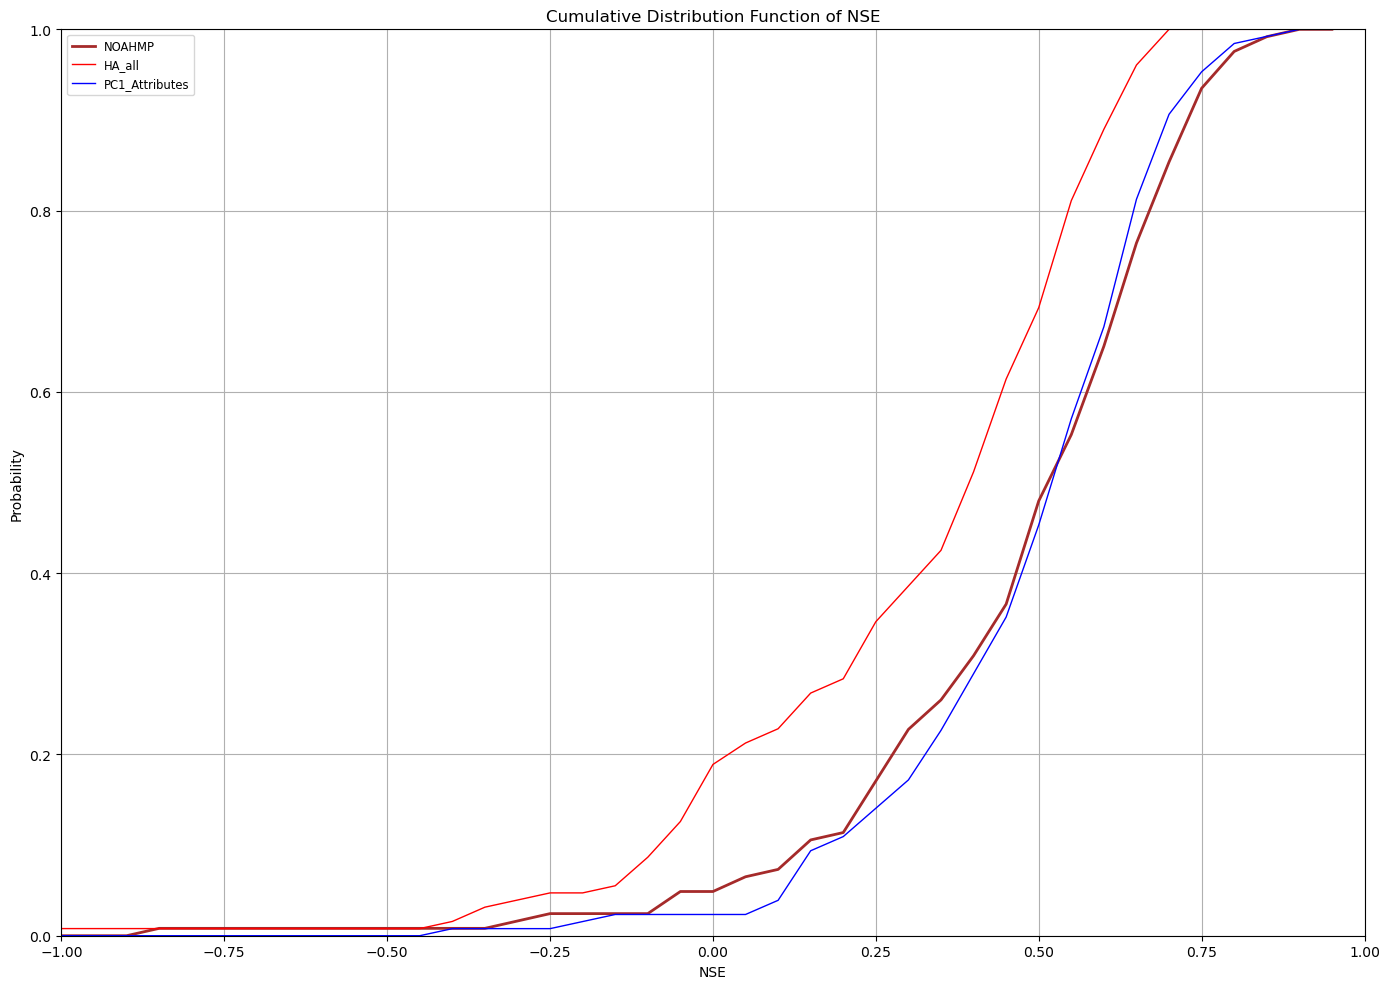

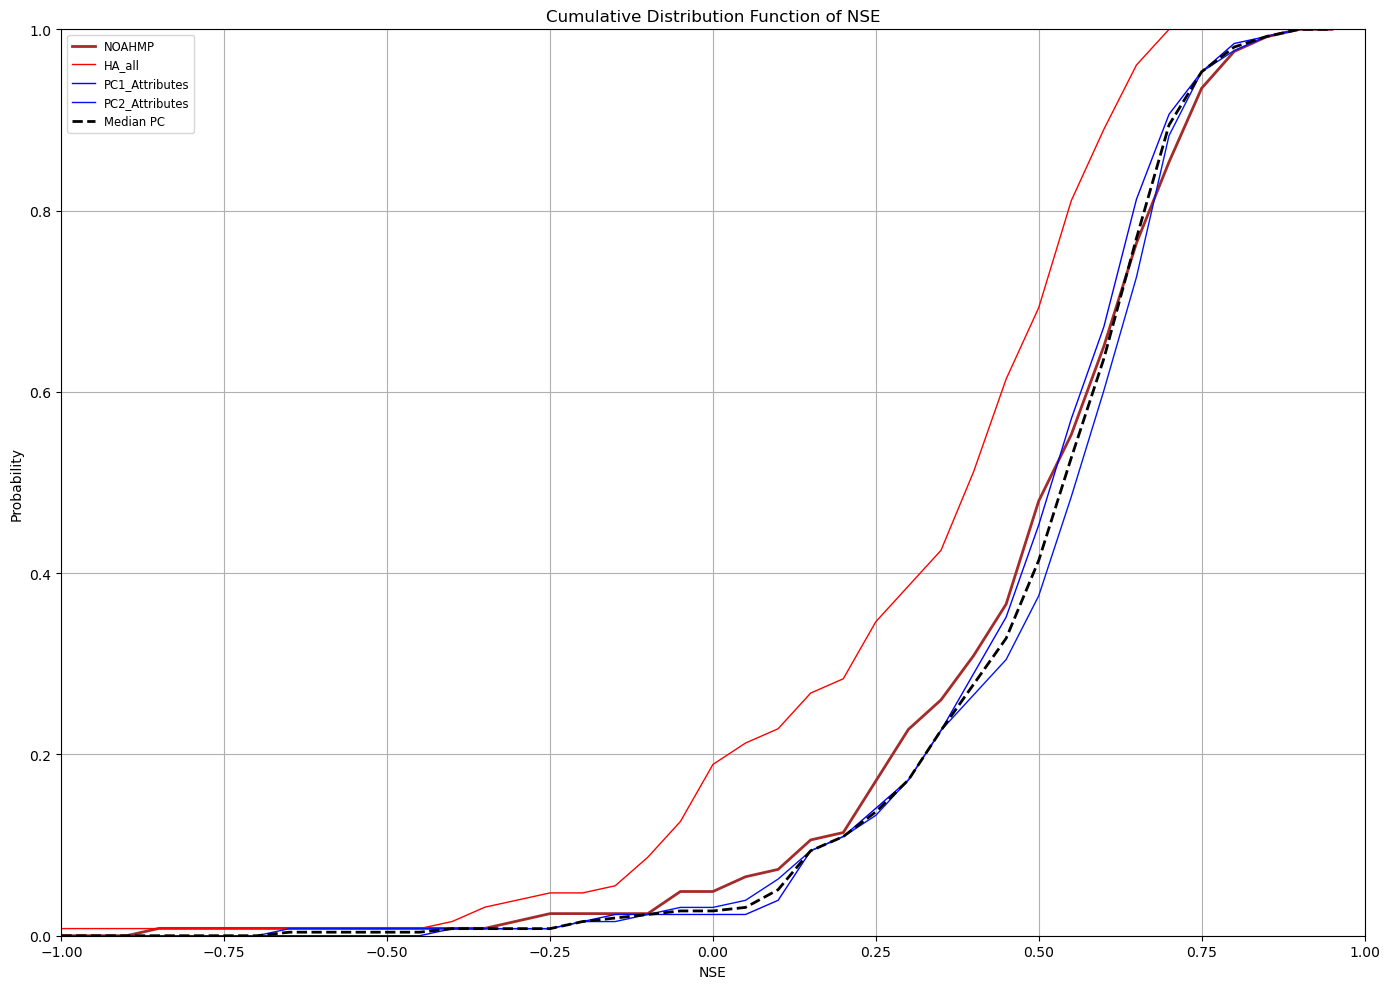

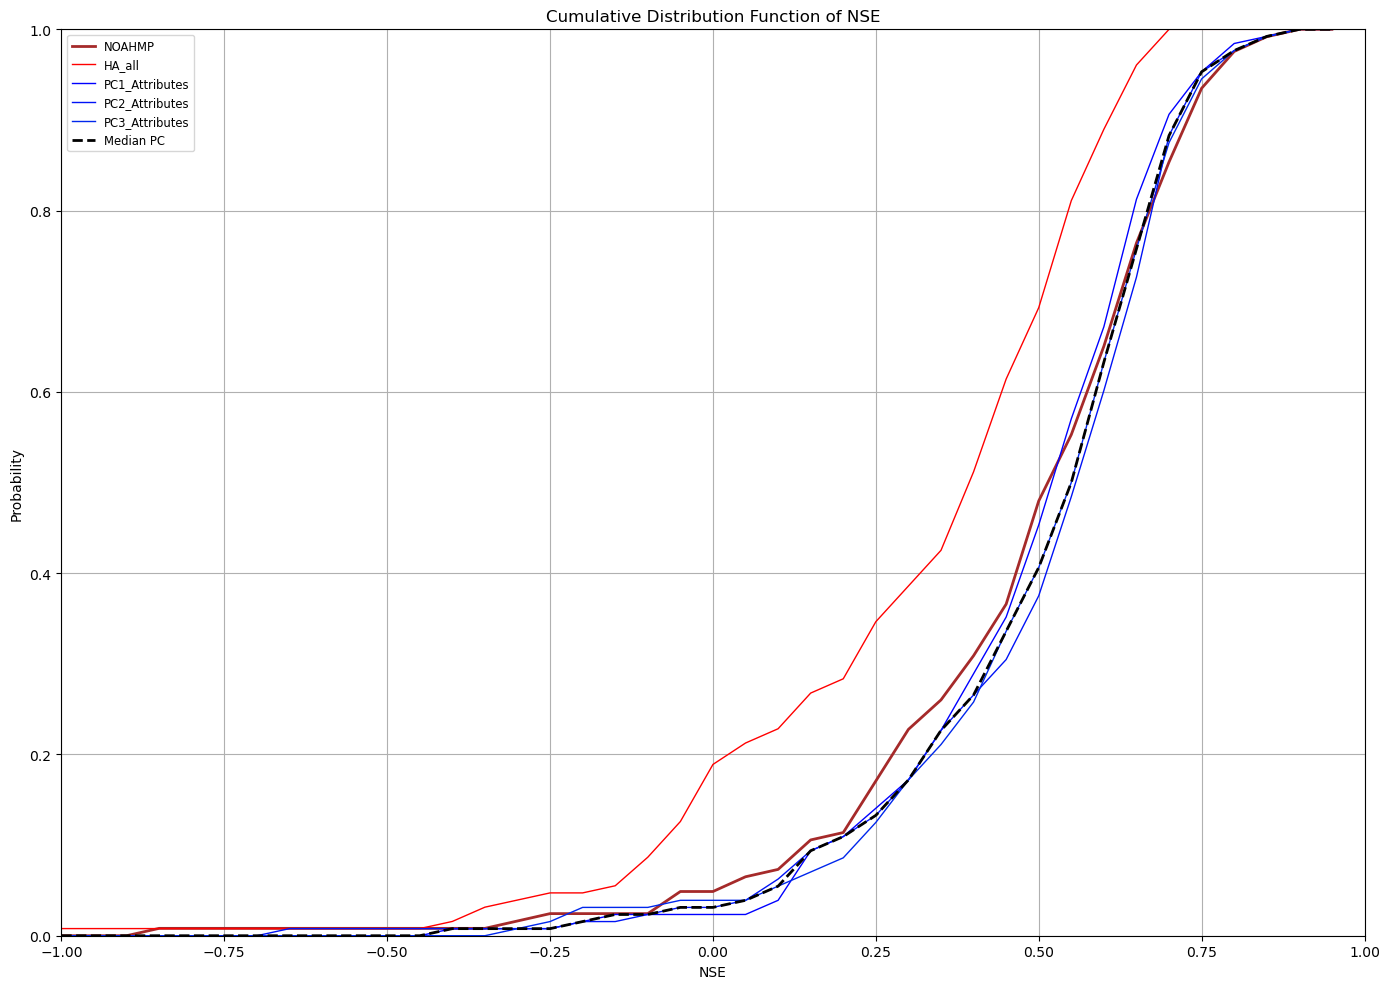

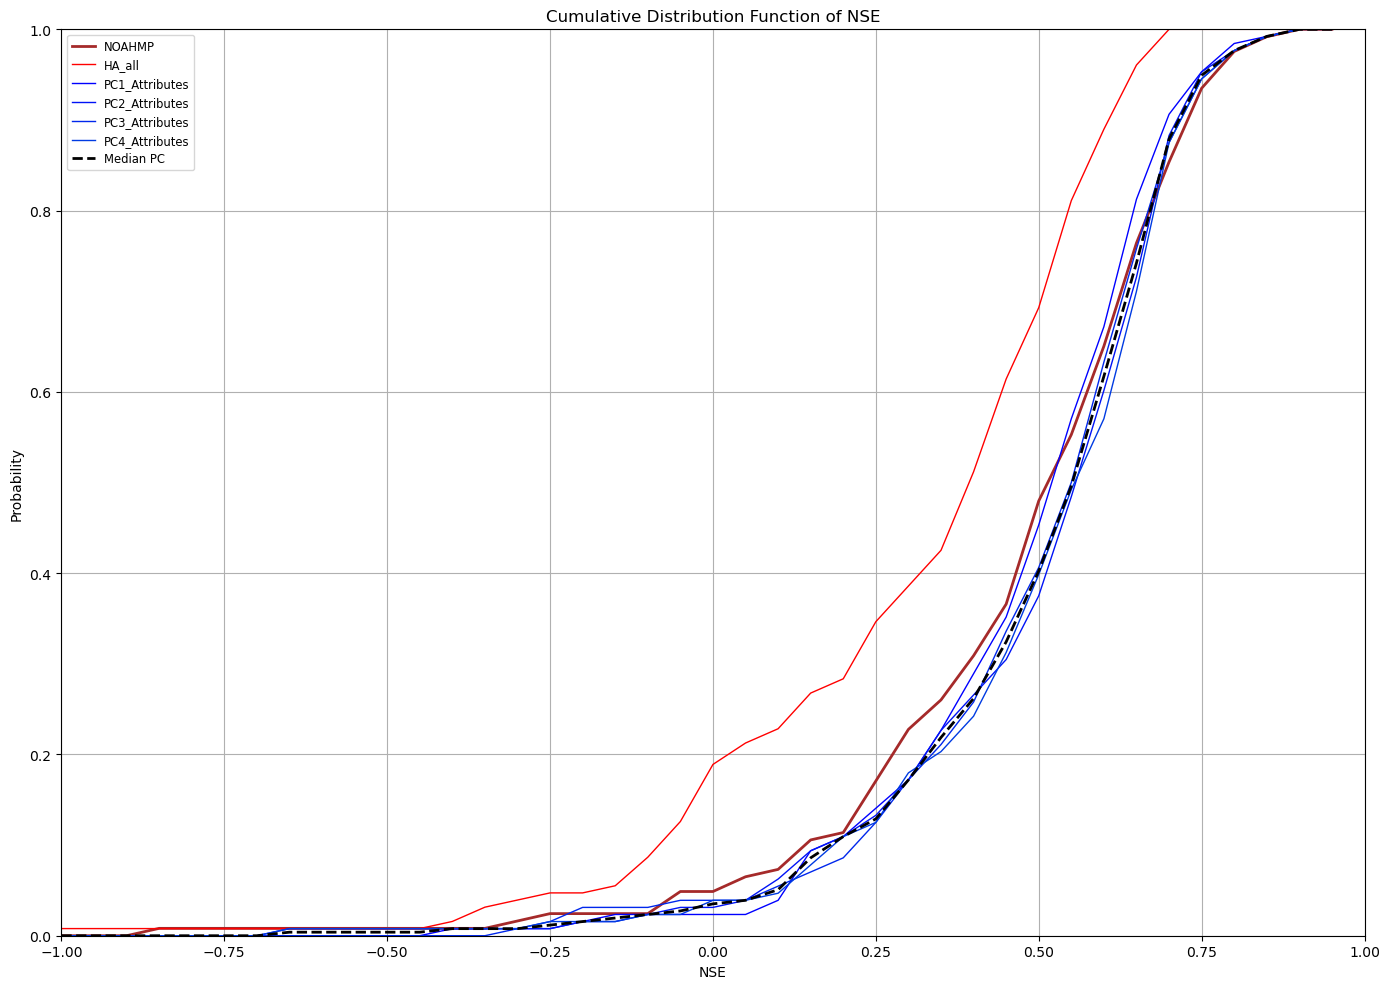

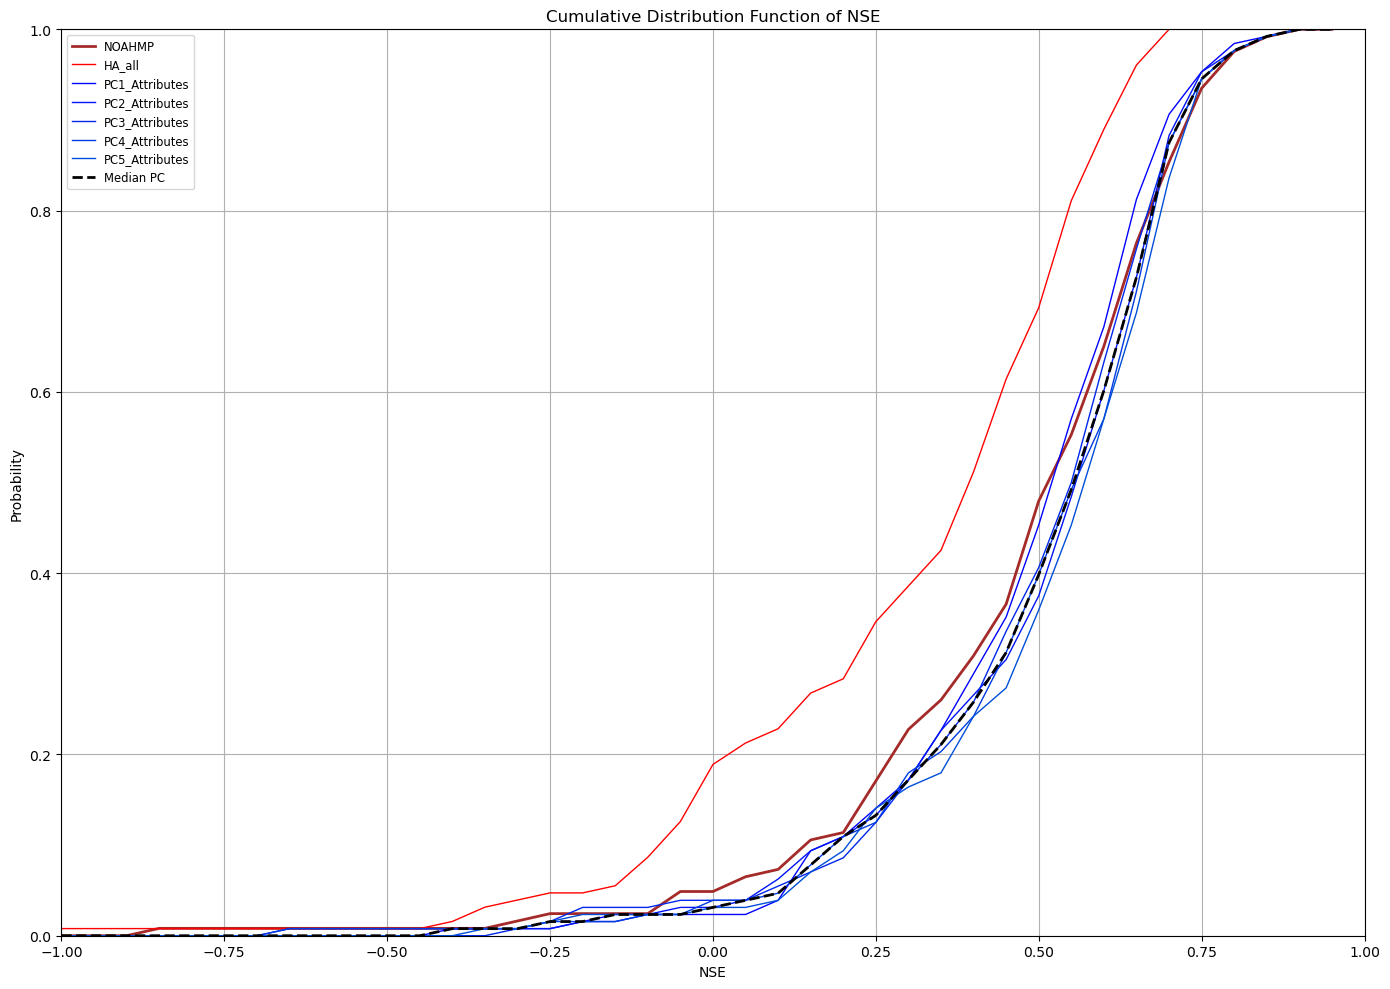

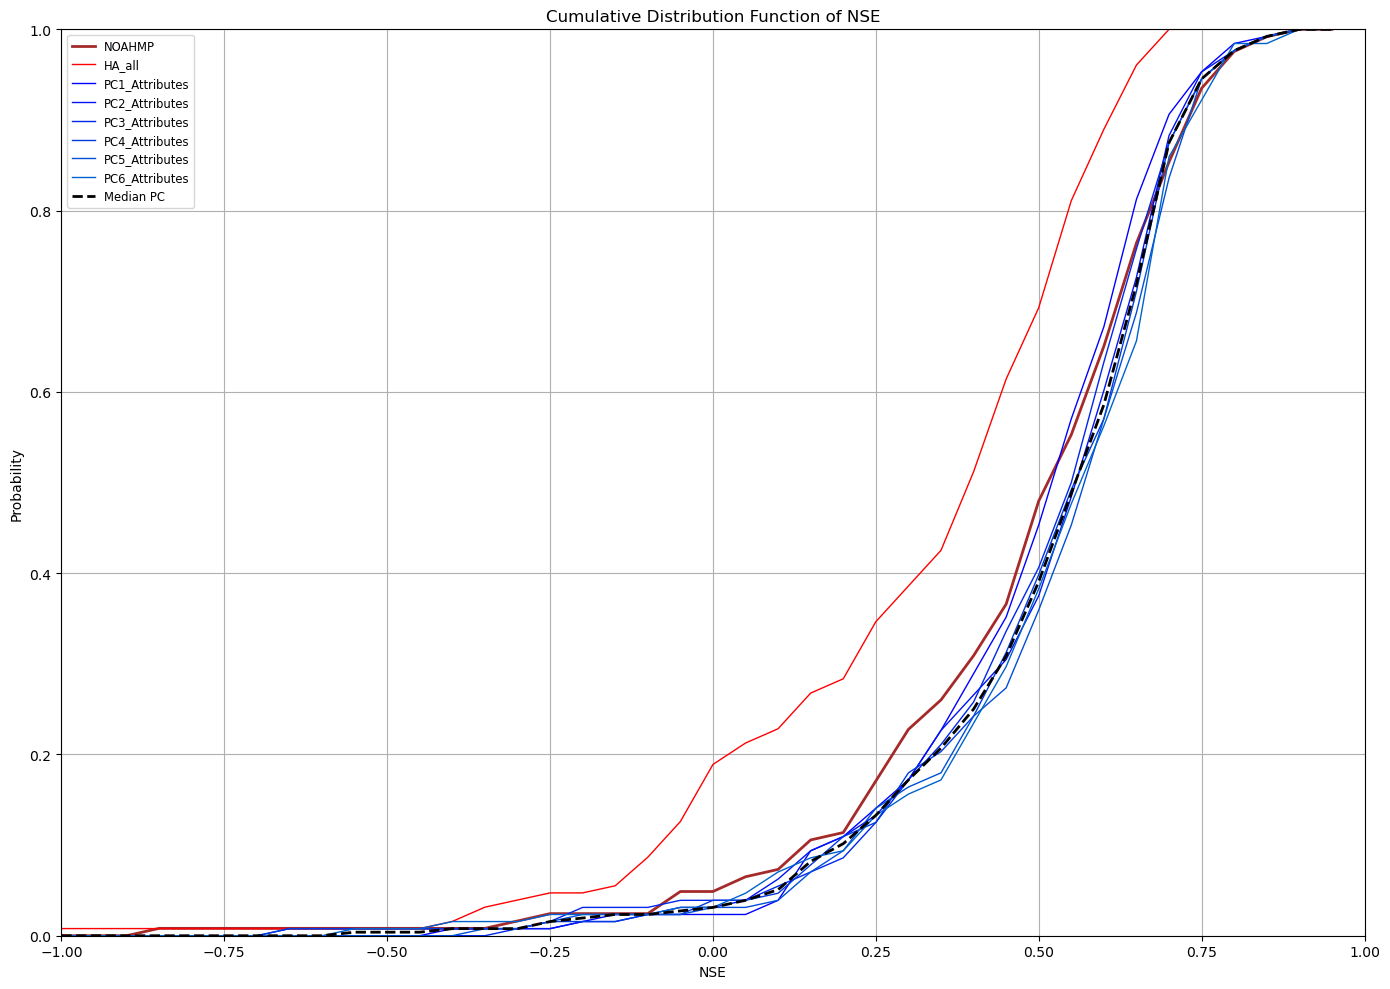

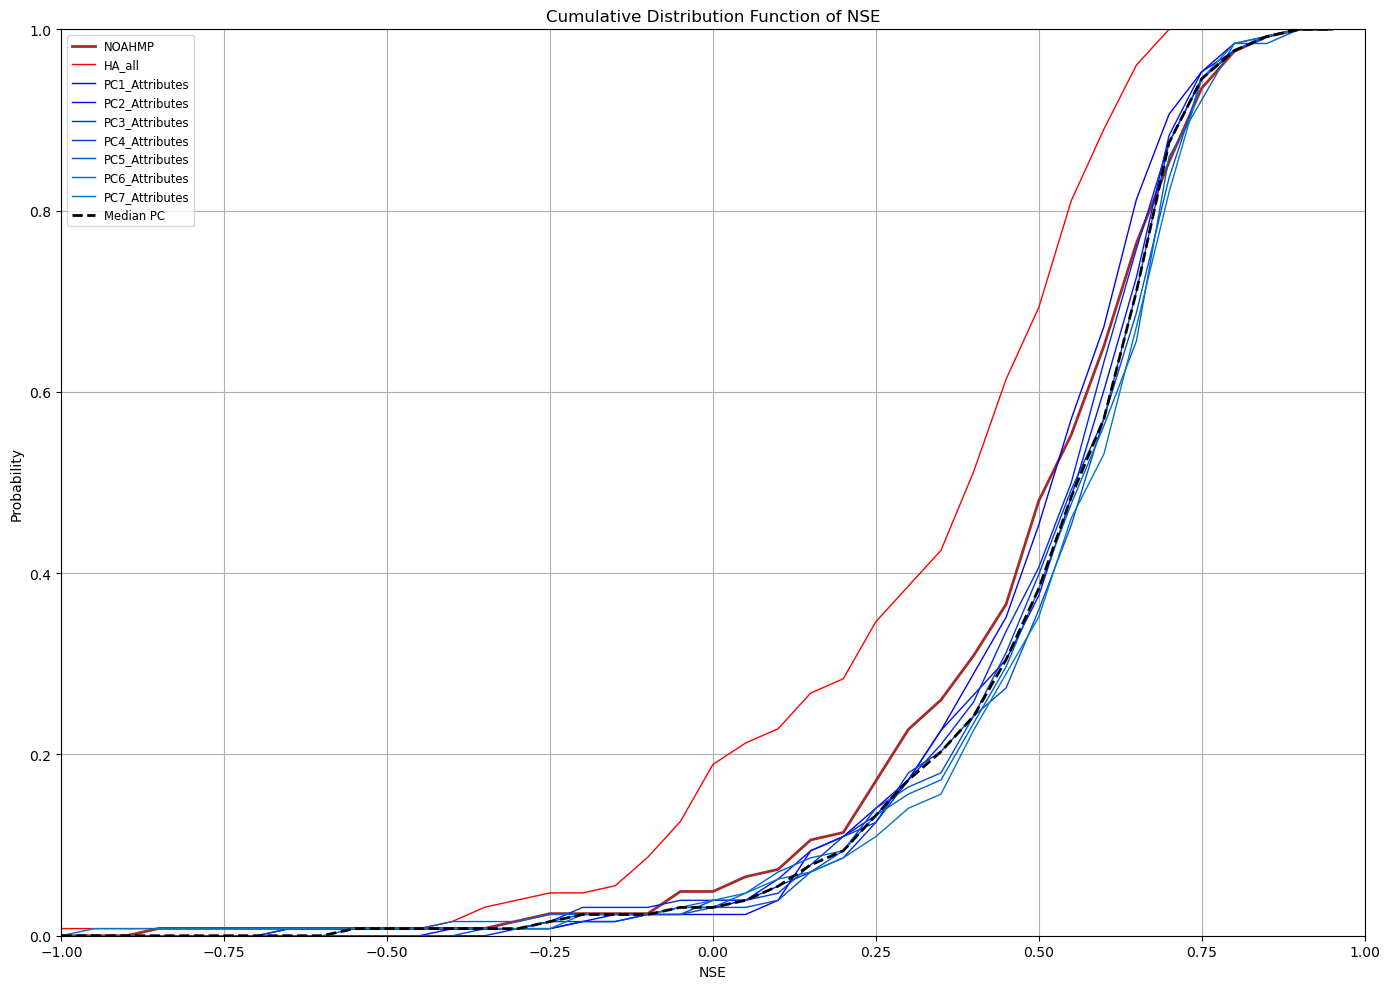

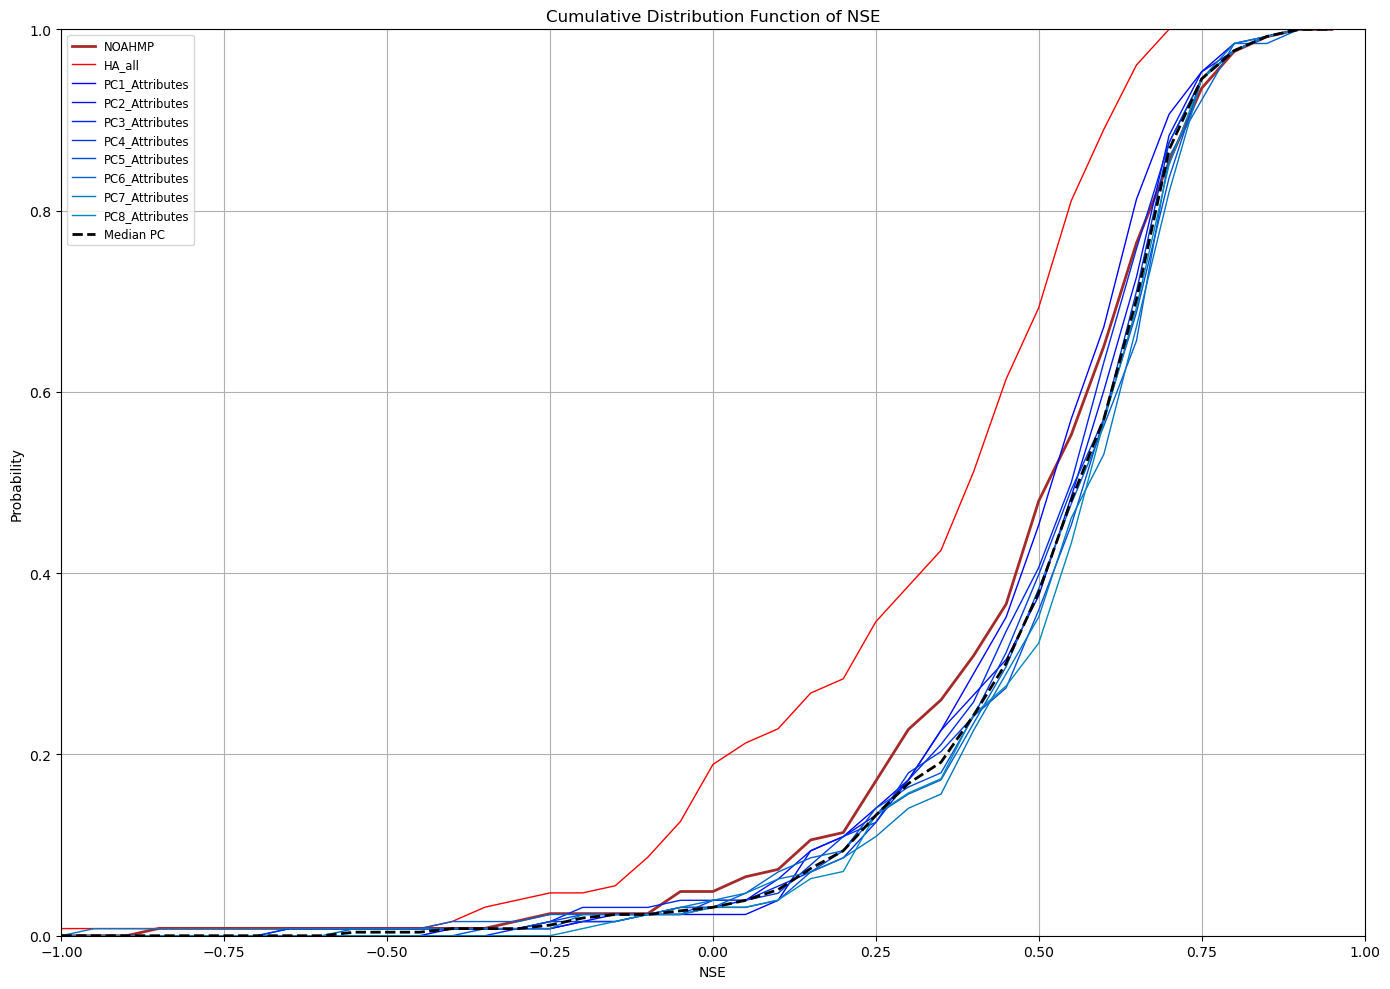

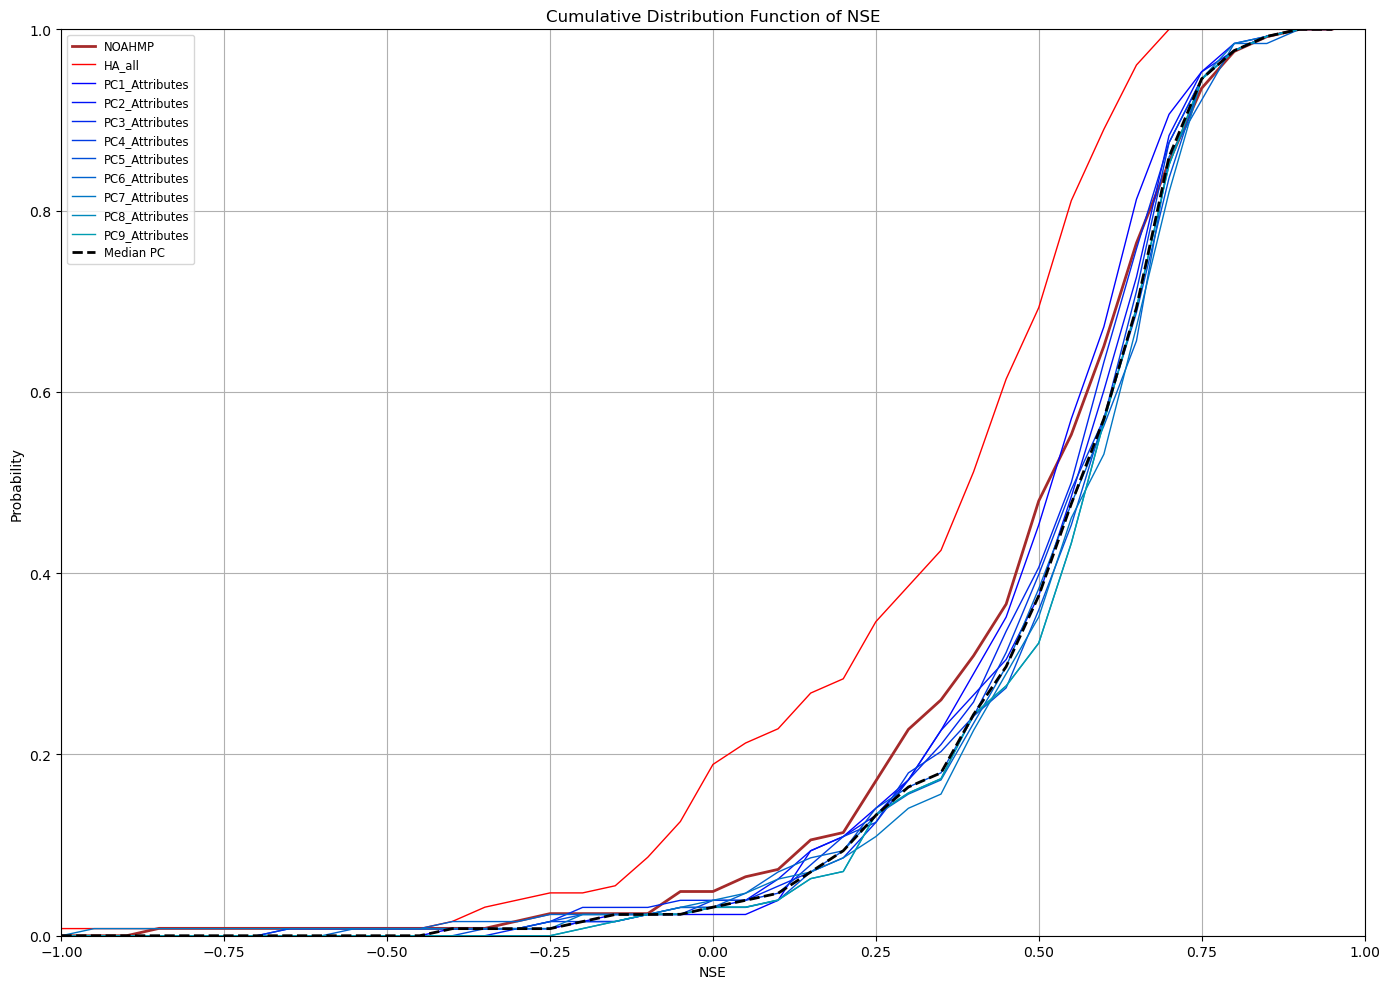

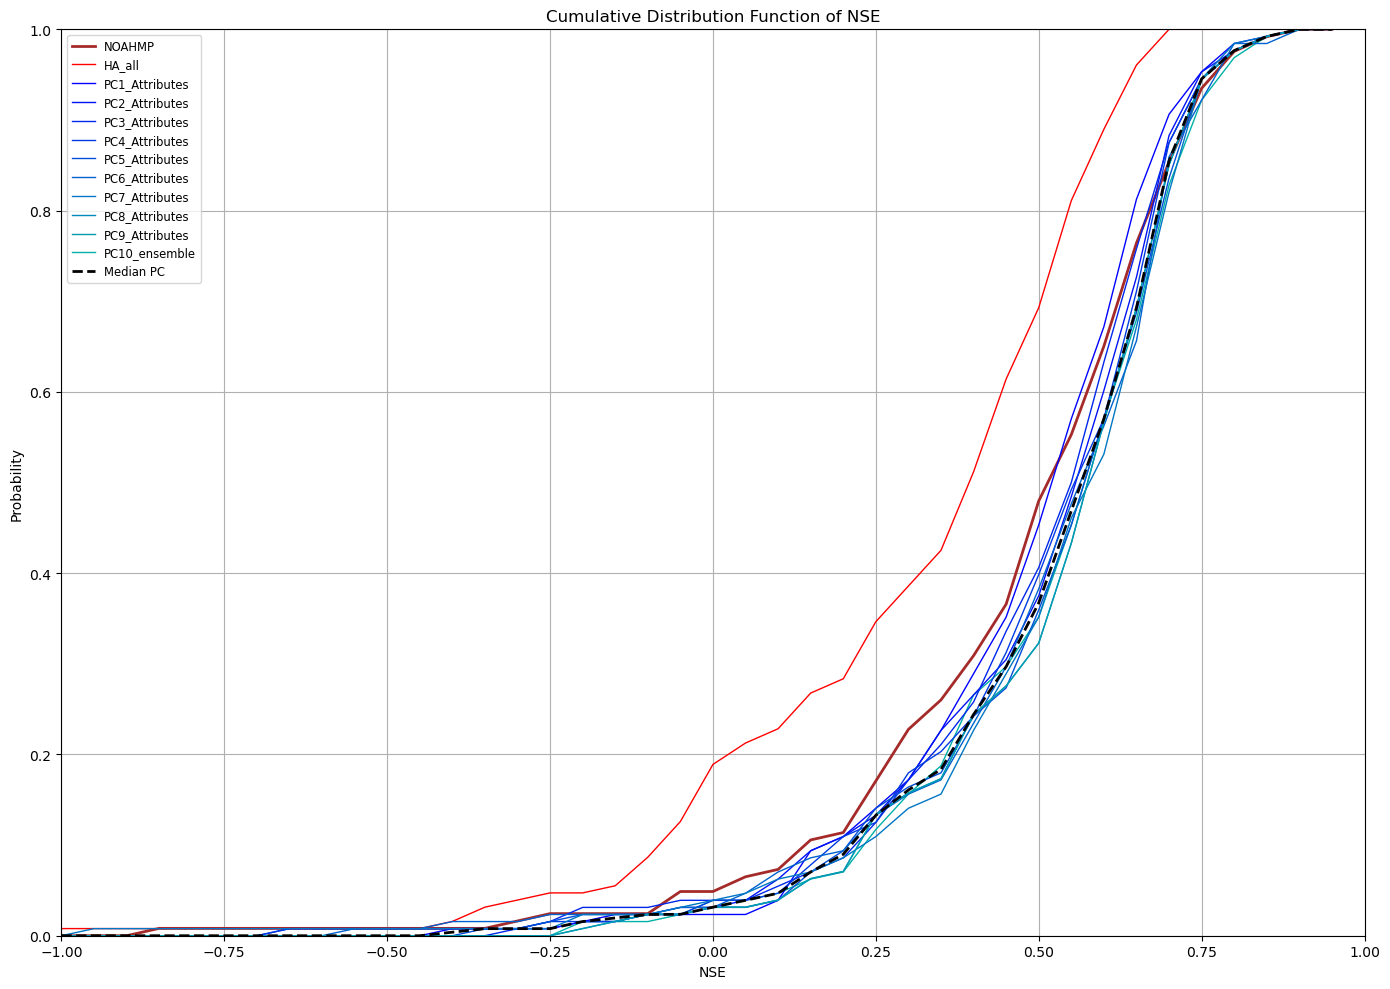

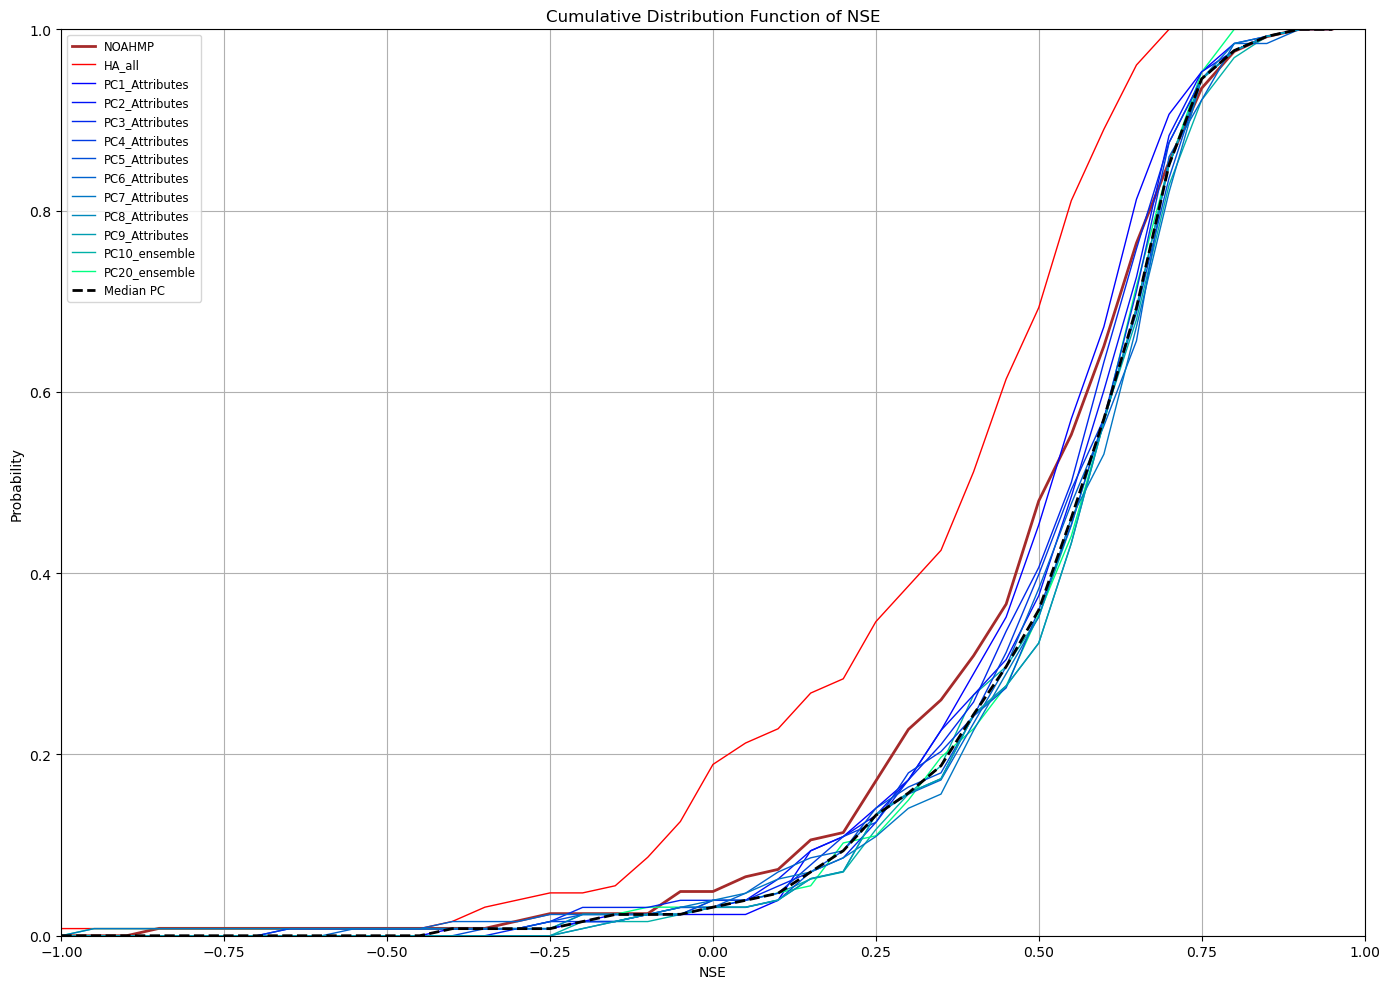

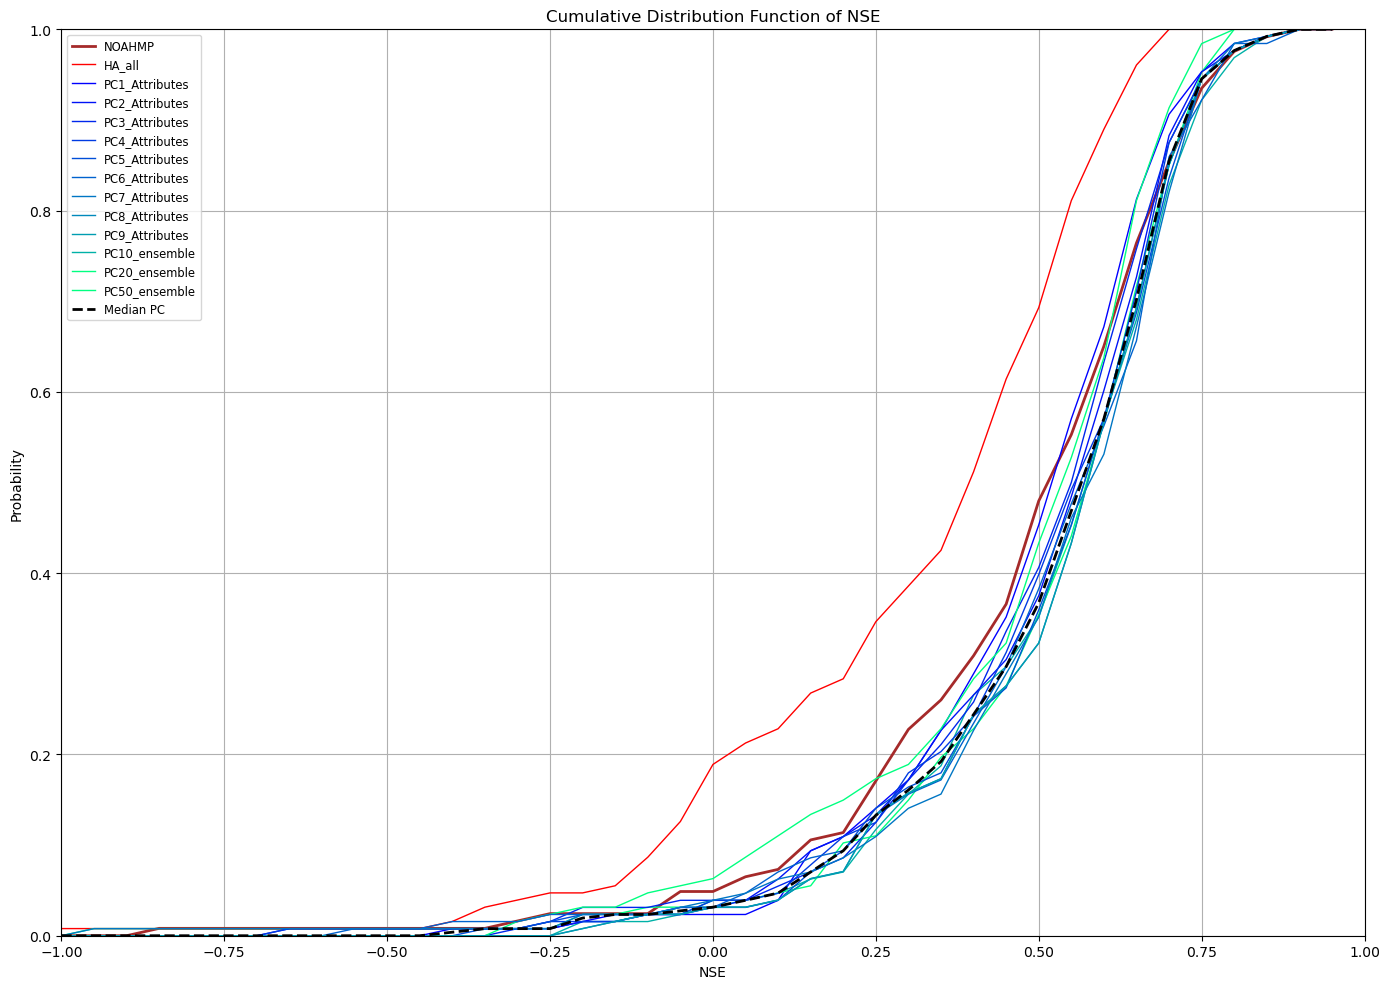

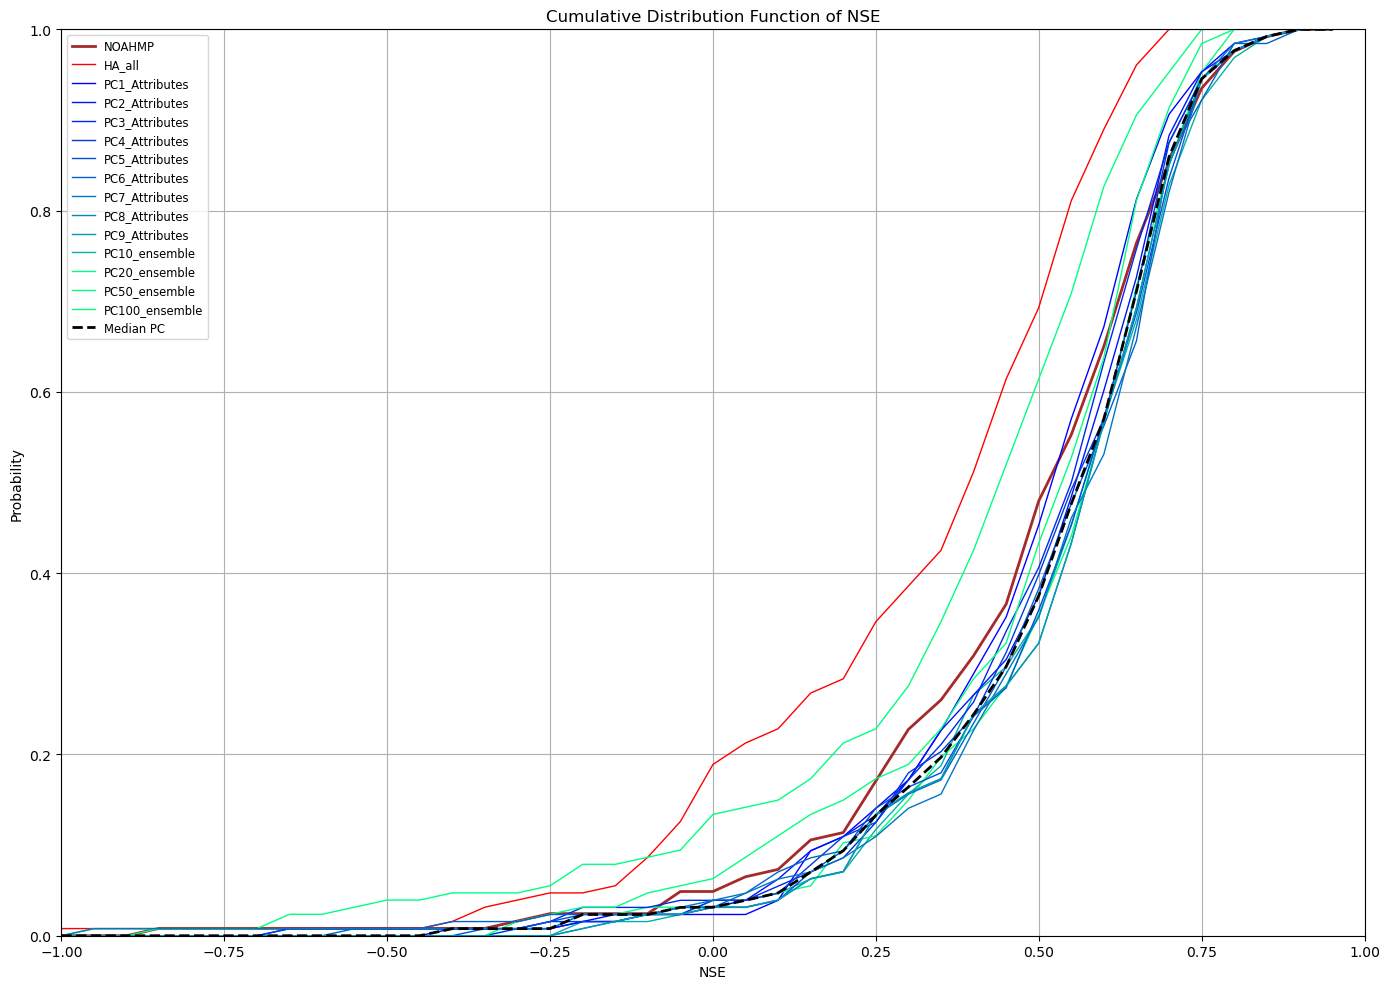

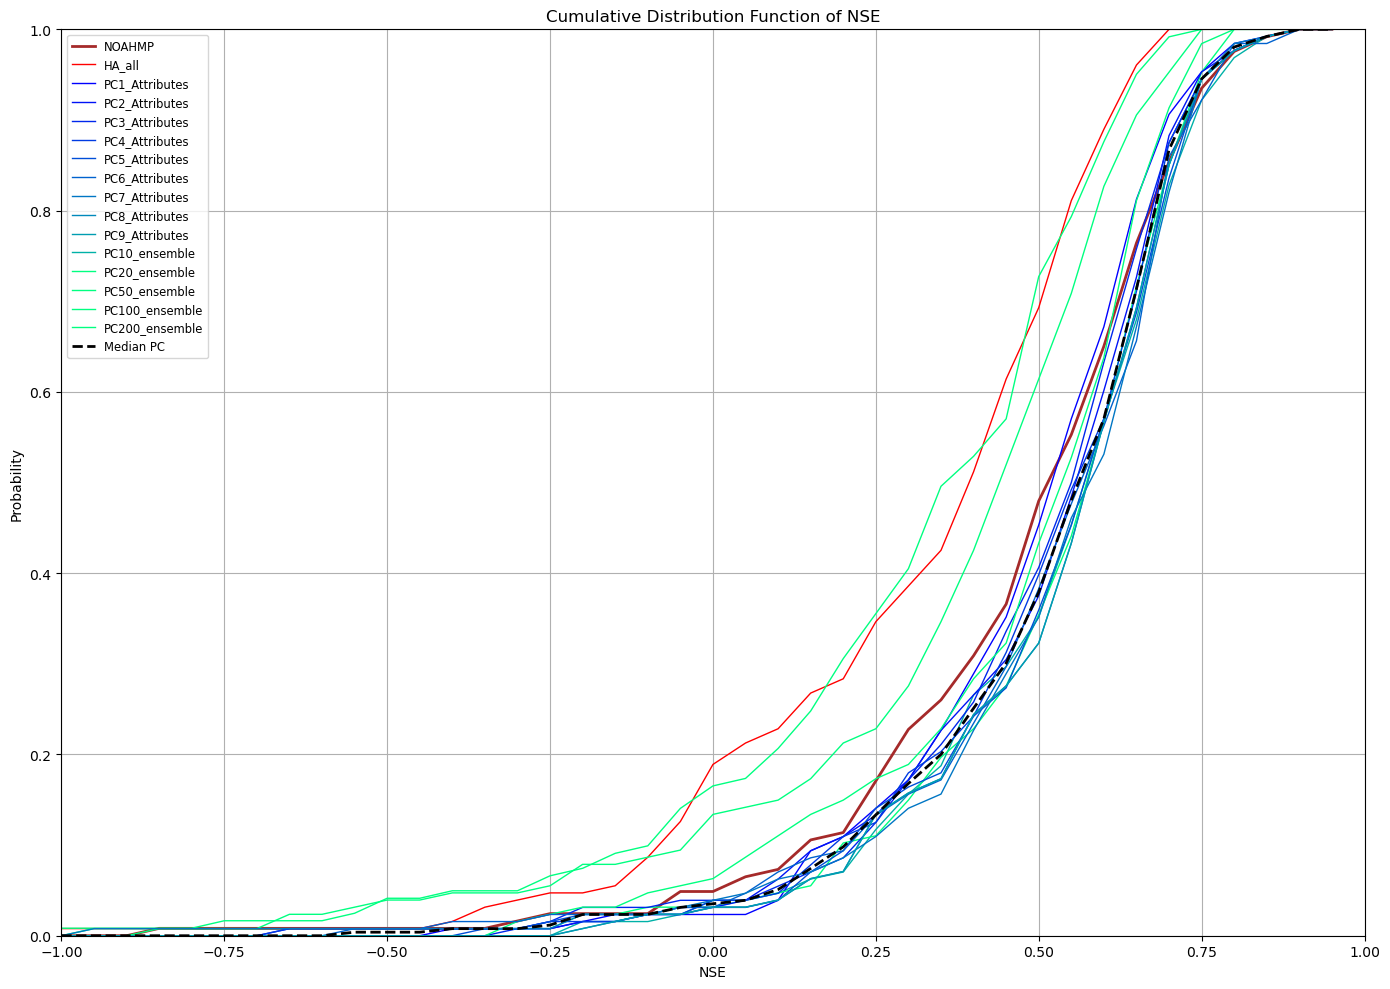

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

def get_folder_names(directory):
    folder_names = []
    for folder in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, folder)):
            folder_names.append(folder)
    return folder_names

def load_dataframes_from_folders(base_directory, folder_names, file_name):
    dataframes = []
    dataframe_names = []
    for folder in folder_names:
        file_path = os.path.join(base_directory, folder, file_name)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            dataframes.append(df)
            dataframe_names.append(folder)
    return dataframes, dataframe_names

def get_pc_number(name):
    match = re.search(r'PC(\d+)', name)
    return int(match.group(1)) if match else float('inf')

def plot_cdf(dataframes, dataframe_names, column, x_min, x_max, selected_pcs, noahmp_df, ha_all_df, num_pcs):
    plt.figure(figsize=(14, 10))

    # Initialize lists for handles and labels
    handles, labels = [], []

    # Plot NOAHMP and HA_All first so that they are in the background
    for name, df in [('NOAHMP', noahmp_df), ('HA_all', ha_all_df)]:
        if df is not None:
            cleaned_data = df[column].dropna()
            values, base = np.histogram(cleaned_data, bins=40, range=(x_min, x_max), density=True)
            cumulative = np.cumsum(values) / np.cumsum(values)[-1]
            color = 'brown' if name == 'NOAHMP' else 'red'
            linewidth = 2 if name == 'NOAHMP' else 1
            line, = plt.plot(base[:-1], cumulative, label=name, color=color, linewidth=linewidth)
            handles.append(line)
            labels.append(name)

    median_values = []

    # Plot each PC line
    for name, df in zip(dataframe_names, dataframes):
        if 'PC' in name and get_pc_number(name) in selected_pcs:
            cleaned_data = df[column].dropna()
            values, base = np.histogram(cleaned_data, bins=40, range=(x_min, x_max), density=True)
            cumulative = np.cumsum(values) / np.cumsum(values)[-1]
            median_values.append(cumulative)
            color_index = float(get_pc_number(name) - 1) / (num_pcs - 1)
            color = plt.cm.winter(color_index)
            line, = plt.plot(base[:-1], cumulative, color=color, linewidth=1)
            handles.append(line)
            labels.append(name)

    # Plot the median line if there are multiple PCs selected
    if len(median_values) > 1:
        median_cdf = np.median(median_values, axis=0)
        median_line, = plt.plot(base[:-1], median_cdf, label='Median PC', color='black', linewidth=2, linestyle='--')
        handles.append(median_line)
        labels.append('Median PC')

    plt.title(f'Cumulative Distribution Function of {column}')
    plt.xlim(x_min, x_max)
    plt.ylim(0, 1)
    plt.xlabel(column)
    plt.ylabel('Probability')

    # Sort the handles and labels based on the numeric value extracted from labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: get_pc_number(t[0]) if 'PC' in t[0] else float('-inf')))
    plt.legend(handles, labels, loc='best', fontsize='small')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_incremental_pcs(base_directory, file_name, column, x_min, x_max):
    ensemble_folders = get_folder_names(base_directory)
    dataframes, dataframe_names = load_dataframes_from_folders(base_directory, ensemble_folders, file_name)

    pc_numbers = sorted([get_pc_number(name) for name in dataframe_names if 'PC' in name])
    noahmp_df = ha_all_df = None
    for df, name in zip(dataframes, dataframe_names):
        if 'NOAHMP' in name:
            noahmp_df = df
        elif 'HA_all' in name:
            ha_all_df = df

    num_pcs = len(pc_numbers)

    # Plot incrementally, adding one PC at a time
    for i in range(1, num_pcs + 1):
        selected_pcs = pc_numbers[:i]
        plot_cdf(dataframes, dataframe_names, column, x_min, x_max, selected_pcs, noahmp_df, ha_all_df, num_pcs)

# Example usage
base_directory = ensembles7  # Replace with your base directory path
file_name = 'test_ensemble_metrics.csv'
ensemble_folders = get_folder_names(base_directory)
dataframes, dataframe_names = load_dataframes_from_folders(base_directory, ensemble_folders, file_name)

plot_incremental_pcs(base_directory, file_name, 'NSE', -1, 1)

In [5]:
def plot_cdf(dataframes, dataframe_names, column, x_min, x_max, highlight_names):
    plt.figure(figsize=(14, 10))

    # Create a color palette that transitions from blue to green
    pc_color_palette = plt.cm.get_cmap('winter')

    # Custom sorting key for "PC" dataframes
    def get_pc_number(name):
        match = re.search(r'PC(\d+)', name)
        return int(match.group(1)) if match else float('inf')

    # Sort the dataframe names using the custom key
    sorted_tuples = sorted(zip(dataframe_names, dataframes), key=lambda x: get_pc_number(x[0]))
    sorted_dataframe_names, sorted_dataframes = zip(*sorted_tuples)

    # Calculate the number of "PC" dataframes for color scaling
    pc_count = sum('PC' in name for name in dataframe_names)

    legend_handles = []  # List to keep track of legend handles

    for i, (df, name) in enumerate(zip(sorted_dataframes, sorted_dataframe_names)):
        # Drop NaN values from the column
        cleaned_data = df[column].dropna()

        # Calculate histogram and cumulative distribution
        values, base = np.histogram(cleaned_data, bins=40, range=(x_min, x_max), density=True)
        cumulative = np.cumsum(values) / np.cumsum(values)[-1]

        # Assign color and style based on dataframe name
        if name in highlight_names:
            color = 'red'
            alpha = 1.0
            linewidth = 2
        elif "PC" in name:
            color = pc_color_palette(i / pc_count)  # Scale color based on index
            alpha = 0.7
            linewidth = 1
        else:
            color = 'grey'  # Default color for other dataframes
            alpha = 1.0
            linewidth = 1

        # Plot the line and add to legend handles
        line, = plt.plot(base[:-1], cumulative, label=name, color=color, alpha=alpha, linewidth=linewidth)
        legend_handles.append(line)

    plt.title(f'Cumulative Distribution Function of {column}')
    plt.xlim(x_min, x_max)
    plt.ylim(0, 1)
    plt.xlabel(column)
    plt.ylabel('Probability')

    # Create the legend with the handles
    plt.legend(handles=legend_handles, loc='best', fontsize='small')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
base_directory = ensembles7  # Replace with your base directory path
file_name = 'test_ensemble_metrics.csv'
ensemble_folders = get_folder_names(base_directory)  # Assuming get_folder_names function is defined
dataframes, dataframe_names = load_dataframes_from_folders(base_directory, ensemble_folders, file_name)

# Now you can use plot_cdf function with these dataframes and their names
plot_cdf(dataframes, dataframe_names, 'NSE', -1, 1)

TypeError: plot_cdf() missing 1 required positional argument: 'highlight_names'

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

def count_pc_names(dataframe_names):
    # This function counts the number of 'PC' dataframes in the given list of names
    return sum('PC' in name for name in dataframe_names)

def plot_cdf(dataframes, dataframe_names, column, x_min, x_max, highlight_names, max_pc=None):
    plt.figure(figsize=(14, 10))

    pc_color_palette = plt.cm.get_cmap('winter')

    def get_pc_number(name):
        match = re.search(r'PC(\d+)', name)
        return int(match.group(1)) if match else float('inf')

    sorted_tuples = sorted(zip(dataframe_names, dataframes), key=lambda x: get_pc_number(x[0]))
    sorted_dataframe_names, sorted_dataframes = zip(*sorted_tuples)

    pc_count = sum('PC' in name for name in dataframe_names)
    if max_pc is not None:
        pc_count = min(pc_count, max_pc)

    median_values = []

    legend_handles = []

    for i, (df, name) in enumerate(zip(sorted_dataframes, sorted_dataframe_names)):
        if max_pc is not None and 'PC' in name and i >= max_pc:
            break

        cleaned_data = df[column].dropna()

        values, base = np.histogram(cleaned_data, bins=40, range=(x_min, x_max), density=True)
        cumulative = np.cumsum(values) / np.cumsum(values)[-1]

        if 'PC' in name:
            median_values.append(cumulative)

        if name in highlight_names:
            color = 'red'
            alpha = 1.0
            linewidth = 2
        elif "PC" in name:
            color = pc_color_palette(i / pc_count)
            alpha = 0.7
            linewidth = 1
        else:
            color = 'grey'
            alpha = 1.0
            linewidth = 1

        line, = plt.plot(base[:-1], cumulative, label=name, color=color, alpha=alpha, linewidth=linewidth)
        legend_handles.append(line)

    if len(median_values) > 1:
        median_curve = np.median(np.array(median_values), axis=0)
        median_line, = plt.plot(base[:-1], median_curve, label='Median PC Performance', color='purple', alpha=0.8, linewidth=2)
        legend_handles.append(median_line)

    plt.title(f'Cumulative Distribution Function of {column}')
    plt.xlim(x_min, x_max)
    plt.ylim(0, 1)
    plt.xlabel(column)
    plt.ylabel('Probability')

    plt.legend(handles=legend_handles, loc='best', fontsize='small')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_cdf(dataframes, dataframe_names, 'NSE', -1, 1, highlight_names, max_pc=3)


NameError: name 'dataframes' is not defined

C:\Users\Rappj\AppData\Local\Temp\ipykernel_28432\4055785562.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pc_color_palette = plt.cm.get_cmap('winter')


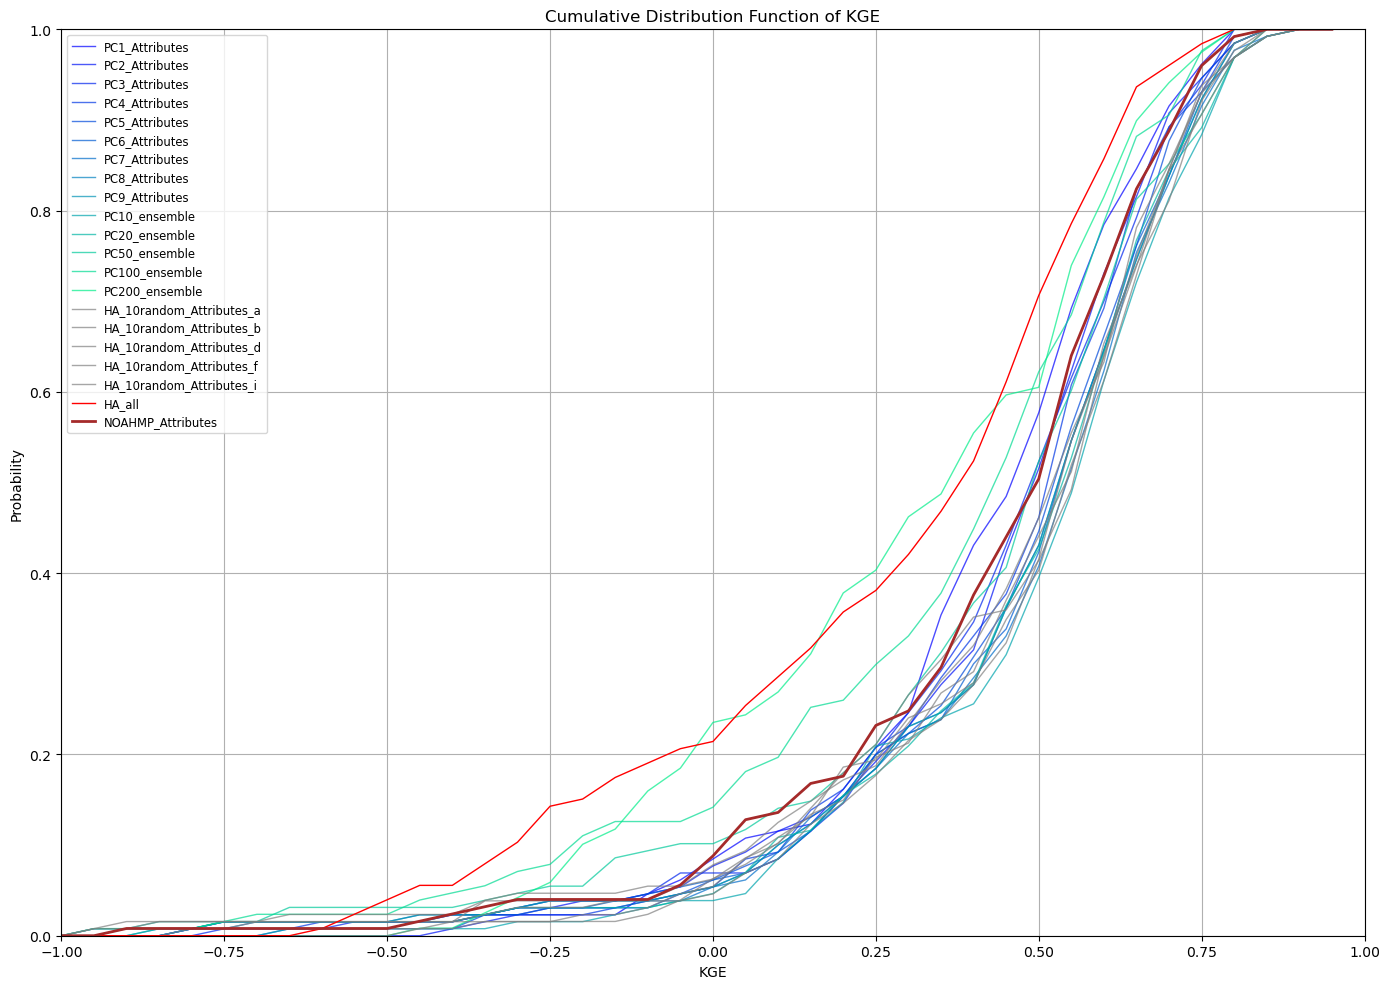

In [14]:
# Now you can use plot_cdf function with these dataframes and their names
plot_cdf(dataframes, dataframe_names, 'KGE', -1, 1)

C:\Users\Rappj\AppData\Local\Temp\ipykernel_28432\4055785562.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pc_color_palette = plt.cm.get_cmap('winter')


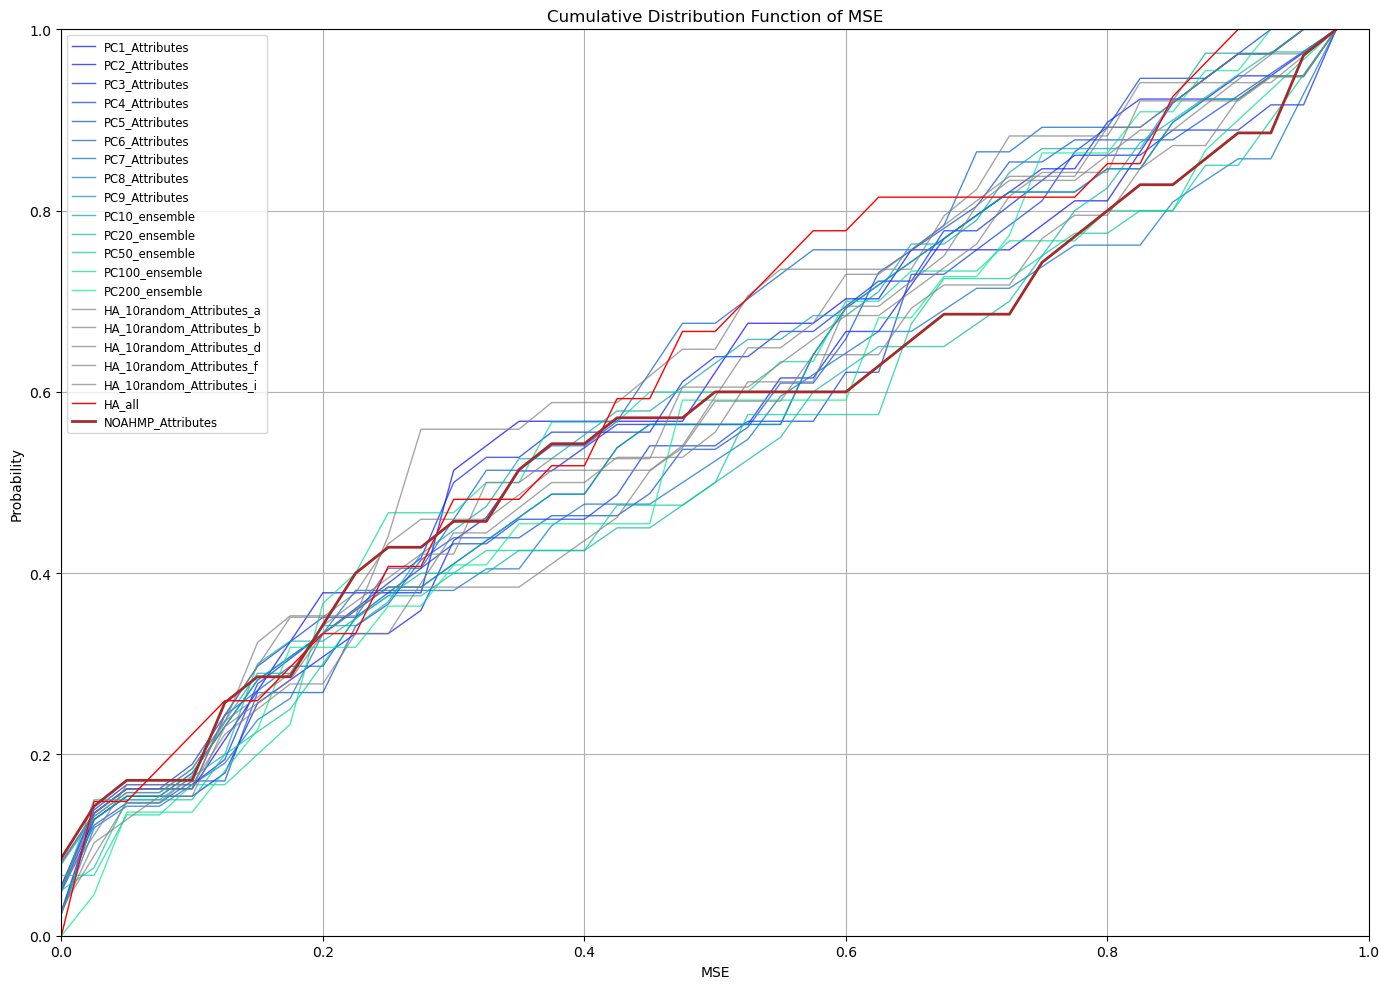

In [15]:
# Now you can use plot_cdf function with these dataframes and their names
plot_cdf(dataframes, dataframe_names, 'MSE', 0, 1)

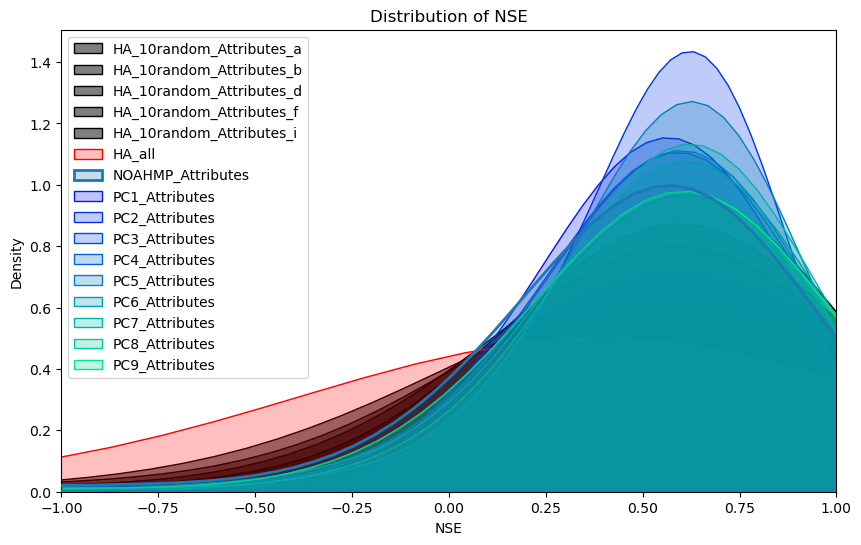

In [47]:

import seaborn as sns

# Adjusted function to create distribution plots with specific color and style rules
def create_distplots(dataframes, dataframe_names, column, x_min, x_max):
    plt.figure(figsize=(10, 6))

    # Color palette for "PC" dataframes
    pc_color_palette = sns.color_palette("winter", len([name for name in dataframe_names if "PC" in name]))

    pc_count = 0  # Counter for "PC" dataframes to assign unique colors
    for df, name in zip(dataframes, dataframe_names):
        # Drop NaN values from the column
        cleaned_data = df[column].dropna()

        # Style assignment based on dataframe name
        if "HA_10random" in name:
            sns.kdeplot(cleaned_data, fill=True, label=name, color='black', alpha=0.5)
        elif "PC" in name:
            sns.kdeplot(cleaned_data, fill=True, label=name, color=pc_color_palette[pc_count])
            pc_count += 1
        elif "HA_all" in name:
            sns.kdeplot(cleaned_data, fill=True, label=name, color='red')
        elif "NOAHMP" in name:
            sns.kdeplot(cleaned_data, fill=True, label=name, linewidth=2, zorder=3)  # NOAHMP to the front
        else:
            sns.kdeplot(cleaned_data, fill=True, label=name)  # Default style

    plt.title(f'Distribution of {column}')
    plt.xlim(x_min, x_max)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend(loc='upper left')
    plt.show()

# Example usage with the same dataframes as before
create_distplots(dataframes, dataframe_names, 'NSE', -1, 1)




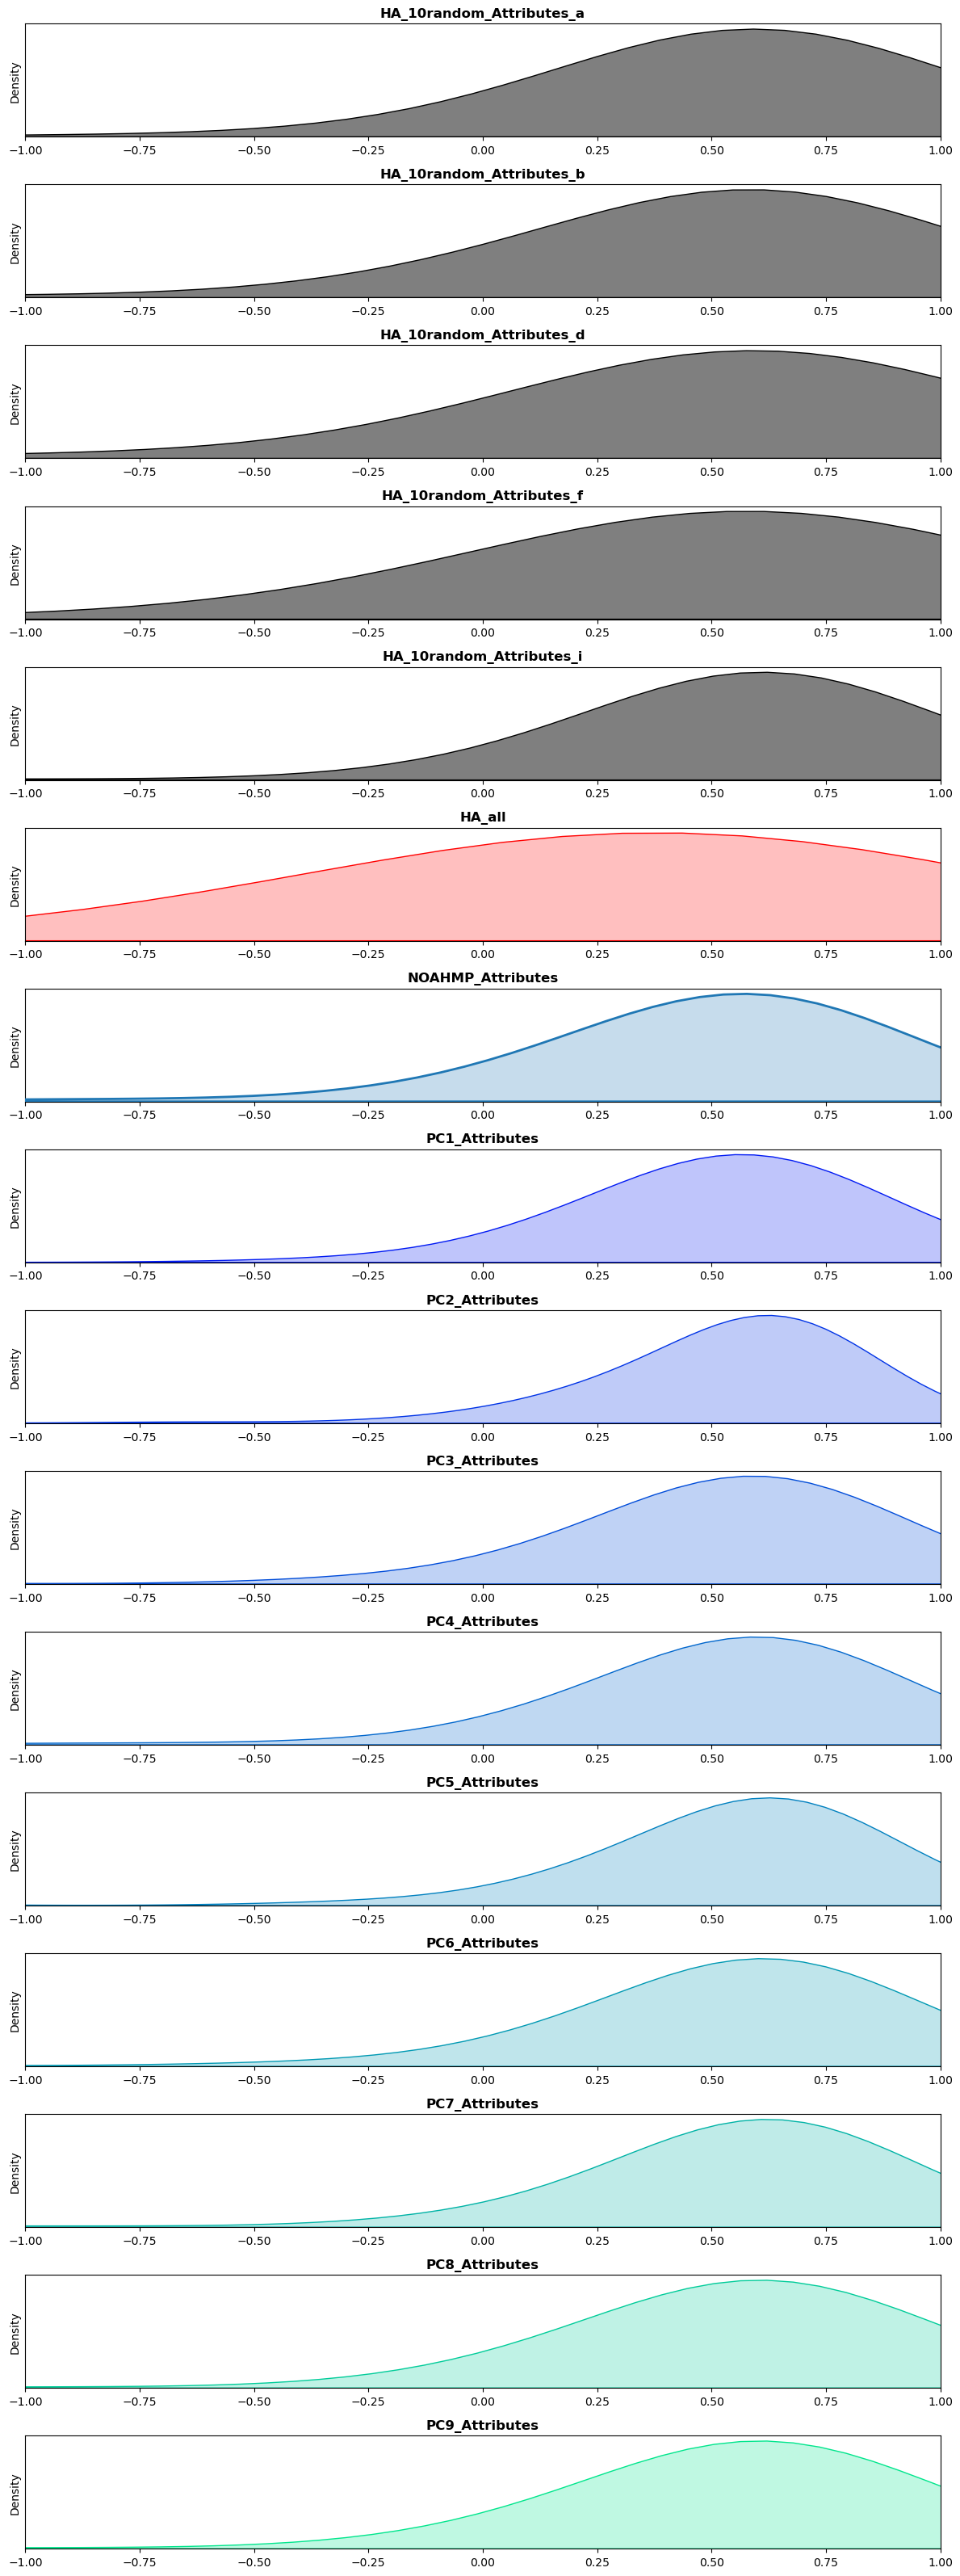

In [48]:
# Function to create a ridge plot using seaborn
def create_ridge_plot(dataframes, dataframe_names, column, x_min, x_max):
    # Set up the matplotlib figure
    plt.figure(figsize=(12, len(dataframes) * 2))

    # Color palette for "PC" dataframes
    pc_color_palette = sns.color_palette("winter", len([name for name in dataframe_names if "PC" in name]))

    pc_count = 0  # Counter for "PC" dataframes to assign unique colors

    for df, name in zip(dataframes, dataframe_names):
        # Drop NaN values from the column
        cleaned_data = df[column].dropna()

        # Subplot for each dataframe
        ax = plt.subplot(len(dataframes), 1, dataframe_names.index(name) + 1)
        
        # Style assignment based on dataframe name
        if "HA_10random" in name:
            sns.kdeplot(cleaned_data, fill=True, color='black', alpha=0.5, ax=ax)
        elif "PC" in name:
            sns.kdeplot(cleaned_data, fill=True, color=pc_color_palette[pc_count], ax=ax)
            pc_count += 1
        elif "HA_all" in name:
            sns.kdeplot(cleaned_data, fill=True, color='red', ax=ax)
        elif "NOAHMP" in name:
            sns.kdeplot(cleaned_data, fill=True, linewidth=2, zorder=3, ax=ax)  # NOAHMP to the front
        else:
            sns.kdeplot(cleaned_data, fill=True, ax=ax)  # Default style

        ax.set_xlim(x_min, x_max)
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_title(name, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Example usage with the same dataframes as before, but as a ridge plot
create_ridge_plot(dataframes, dataframe_names, 'NSE', -1, 1)

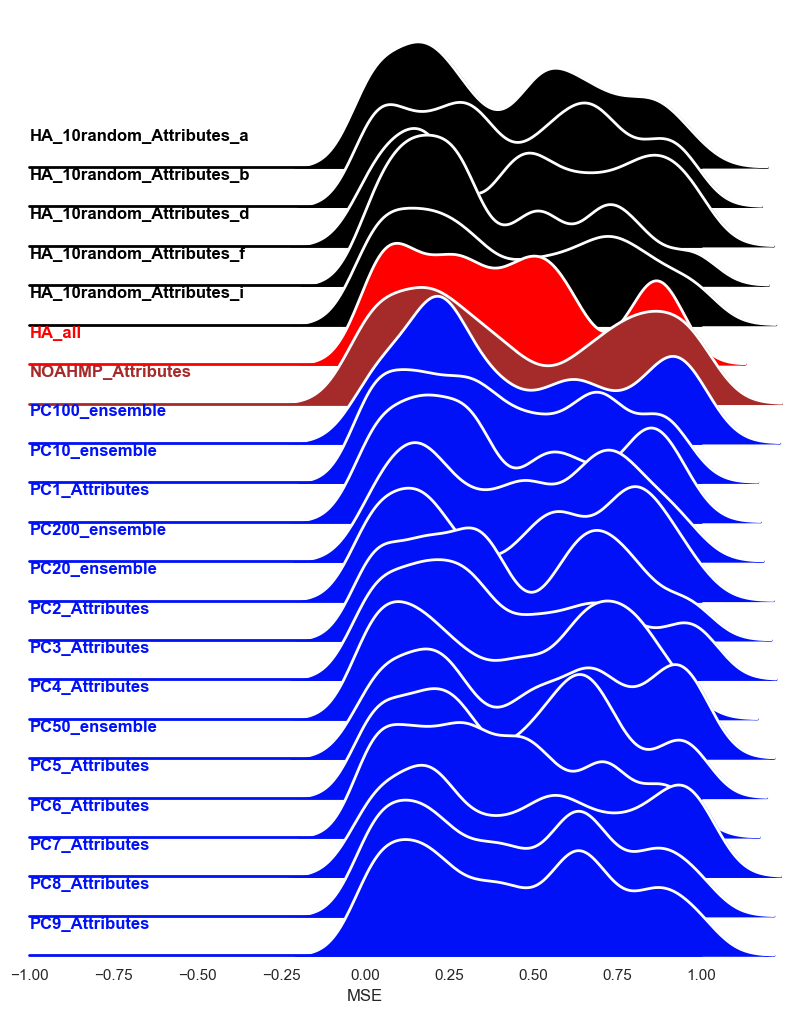

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted function to trim the datasets down to just between -1 and 1
def create_custom_ridge_plot(dataframes, dataframe_names, column, x_min, x_max, style_colors):
    # Prepare the data, trimming to the range between x_min and x_max
    all_data = pd.concat([df[(df[column] >= x_min) & (df[column] <= x_max)] for df in dataframes], 
                         keys=dataframe_names, 
                         names=['name']).reset_index(level=1, drop=True).reset_index()
    all_data = all_data.rename(columns={column: 'value'})

    # Merge the style_colors dataframe to assign colors based on the 'name'
    all_data = all_data.merge(style_colors, on='name')

    # Set the Seaborn theme
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Create the FacetGrid object with the custom style
    pal = dict(zip(style_colors['name'], style_colors['color']))
    g = sns.FacetGrid(all_data, row='name', hue='name', aspect=15, height=0.5, palette=pal)

    # Draw the densities
    g.map(sns.kdeplot, 'value', bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, 'value', clip_on=False, color="w", lw=2, bw_adjust=.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

    g.map(label, 'value')

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-0.75)

    # Remove unwanted axes details
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    # Set the x-axis limits for all subplots
    for ax in g.axes.flat:
        ax.set_xlim(x_min, x_max)

    # Set the x-axis label for the bottom subplot
    g.axes[-1, 0].set_xlabel(column)

    plt.show()


# Prepare the style colors dataframe from the earlier custom styles
# Color palette for "PC" dataframes
pc_color_palette = sns.color_palette("winter", len([name for name in dataframe_names if "PC" in name]))
pc_count = 0  # Initialize the counter for PC dataframes

style_colors = pd.DataFrame({
    'name': dataframe_names,
    'color': [
        'black' if 'HA_10random' in name else
        pc_color_palette[pc_count] if 'PC' in name else
        'red' if 'HA_all' in name else
        'brown' if 'NOAHMP' in name else
        'grey'  # Default color if no condition is met
        for name in dataframe_names]
})

# Increment the PC color counter if 'PC' is in the name
for i, name in enumerate(dataframe_names):
    if 'PC' in name:
        pc_count += 1

# Plot the custom ridge plot
create_custom_ridge_plot(dataframes, dataframe_names, 'MSE', -1, 1, style_colors)


              basin        value          MSE          KGE
count  2.665000e+03  2665.000000  2665.000000  2665.000000
mean   5.600214e+06     0.525960     4.174184     0.483230
std    3.880720e+06     0.256025     6.001990     0.313745
min    1.047000e+06    -0.991393     0.005022    -3.583870
25%    2.177000e+06     0.418318     0.917601     0.353525
50%    4.057800e+06     0.590689     2.099217     0.563880
75%    8.380500e+06     0.700837     4.803043     0.679921
max    1.423620e+07     0.936306    50.535450     0.926817


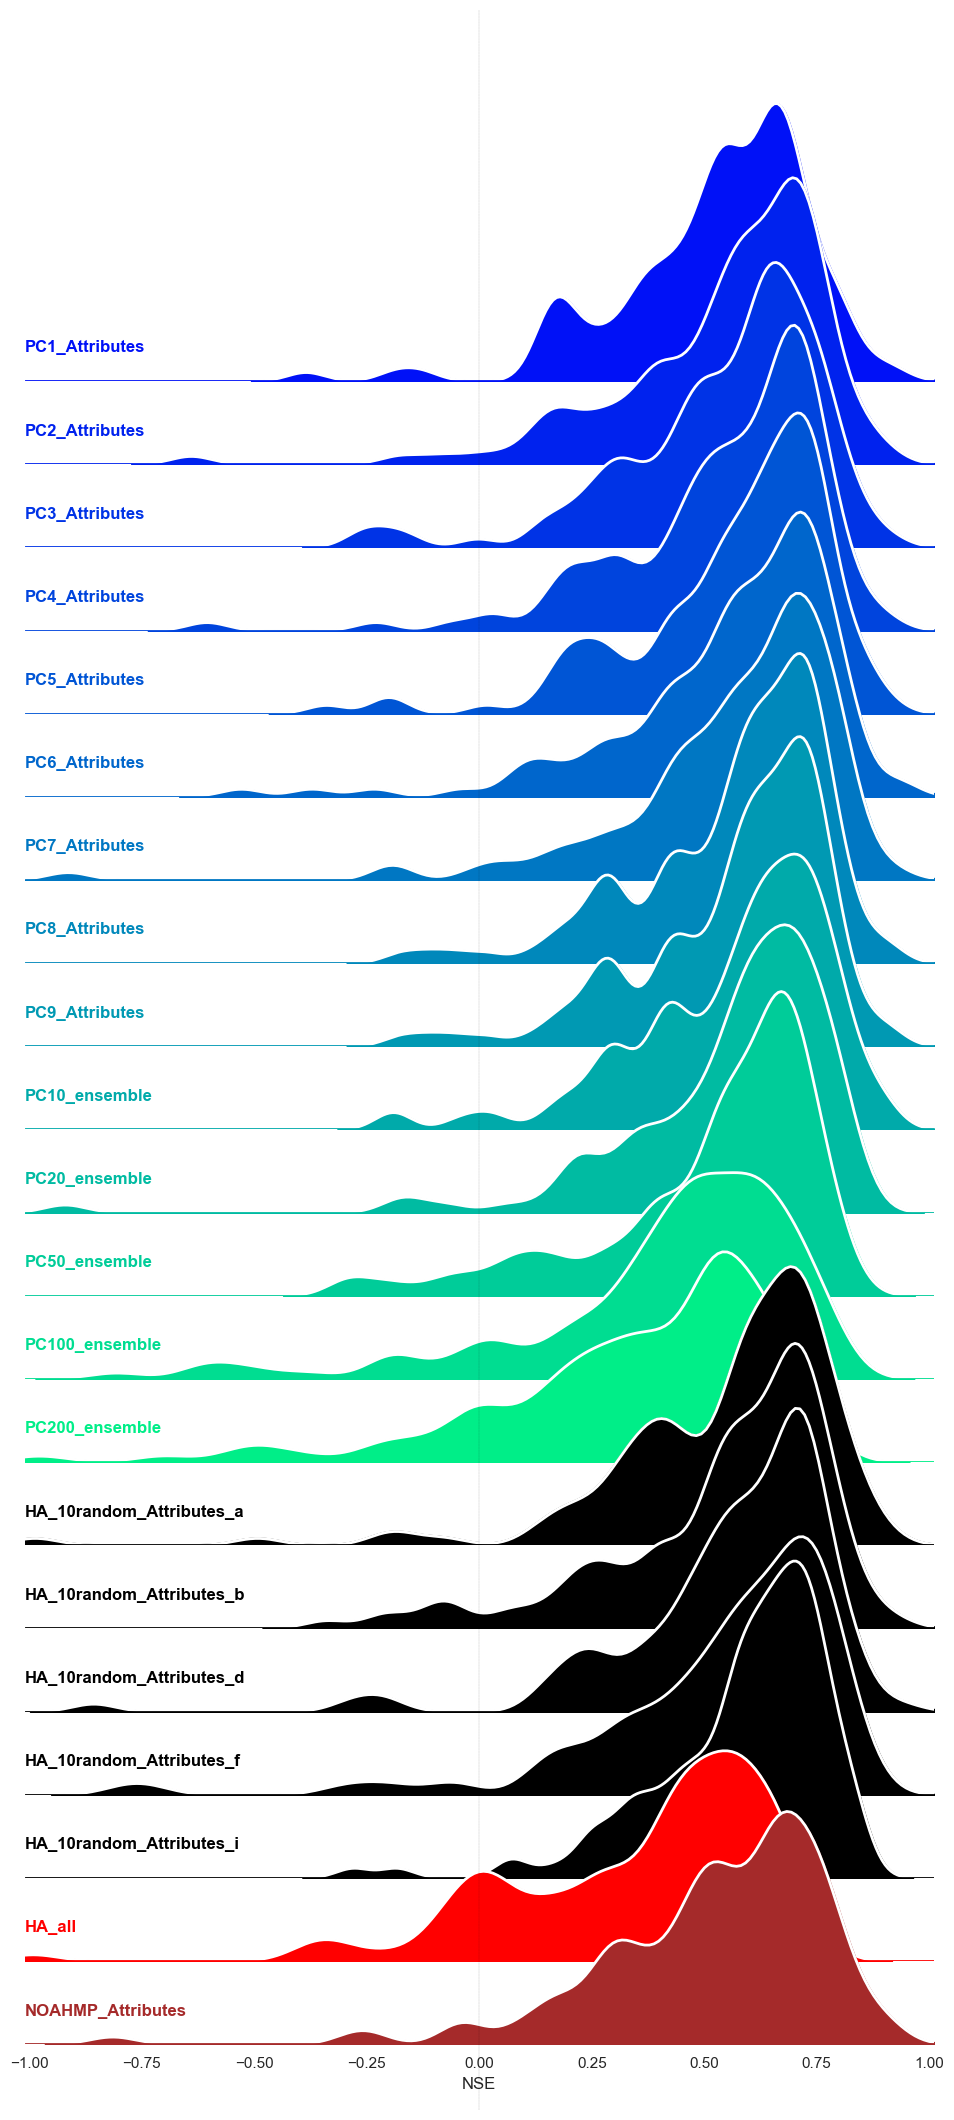

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Adjusted function to create custom ridge plots
def create_custom_ridge_plot(dataframes, dataframe_names, column, x_min, x_max):
    # Prepare the data, trimming to the range between x_min and x_max
    all_data = pd.concat([df[(df[column] >= x_min) & (df[column] <= x_max)] for df in dataframes], 
                         keys=dataframe_names, 
                         names=['name']).reset_index(level=1, drop=True).reset_index()
    all_data = all_data.rename(columns={column: 'value'})
    print(all_data.describe())
    # Sorting function for PC dataframes
    def get_pc_number(name):
        match = re.search(r'PC(\d+)', name)
        return int(match.group(1)) if match else float('inf')

    # Sort the dataframe names and corresponding data
    sorted_tuples = sorted(zip(dataframe_names, all_data.groupby('name')), key=lambda x: get_pc_number(x[0]))
    sorted_dataframe_names, sorted_groups = zip(*sorted_tuples)

    # Combine sorted groups back into a dataframe
    sorted_all_data = pd.concat([group for _, group in sorted_groups], keys=sorted_dataframe_names).reset_index(level=1, drop=True).reset_index()

    # Prepare the style colors dataframe
    style_colors = pd.DataFrame({
        'name': sorted_dataframe_names,
        'color': [
            'black' if 'HA_10random' in name else
            'red' if 'HA_all' in name else
            'brown' if 'NOAHMP' in name else
            sns.color_palette("winter", len([n for n in sorted_dataframe_names if "PC" in n]))[i % 20]  # Cycle through the PC colors
            for i, name in enumerate(sorted_dataframe_names)]
    })

    # Merge the style_colors dataframe to assign colors based on the 'name'
    sorted_all_data = sorted_all_data.merge(style_colors, on='name')

    # Set the Seaborn theme
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Create the FacetGrid object with the custom style
    pal = dict(zip(sorted_all_data['name'], sorted_all_data['color']))
    g = sns.FacetGrid(sorted_all_data, row='name', hue='name', height=1, aspect=10, palette=pal)

    # Draw the densities
    g.map(sns.kdeplot, 'value', bw_adjust=.5, clip_on=True, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, 'value', clip_on=True, color="w", lw=2, bw_adjust=.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=True)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .1, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

    g.map(label, 'value')
    
    # Remove unwanted axes details
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    # Set the x-axis limits for all subplots
    # Set the x-axis limits with a small margin
    x_margin = 0.01  # This small margin ensures that the line at the edge will be visible
    for ax in g.axes.flat:
        ax.set_xlim(x_min - x_margin, x_max + x_margin)

    # Set the x-axis label for the bottom subplot
    g.axes[-1, 0].set_xlabel(column)

        # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-0.75)

    # Draw the lines across all subplots
    # line_positions = [.5, 1]
    # for xpos in line_positions:
    #     # Get the figure's y-coordinates for the bottom and top of the subplots
    #     bottom_pos = g.axes[-1, 0].get_position().y0
    #     top_pos = g.axes[0, 0].get_position().y1
    #     # Draw a line across the full height of the grid
    #     plt.plot([xpos, xpos], [bottom_pos, top_pos], transform=g.fig.transFigure, color='black', linestyle='--', linewidth=0.1, clip_on=False)
    # line_positions = [0.0, 1.0]
    # for xpos in line_positions:
    #     g.fig.suptitle('')  # Clear supertitle to avoid overlap with lines
    #     plt.axvline(x=xpos, color='black', linestyle='--', linewidth=0.1, clip_on=False)

    # Define the x-axis positions where you want the dashed lines to be drawn (NSE values)
    line_positions = [0.0, 1.0]

    # Transform these x-axis positions to normalized figure coordinates
    transFigure = g.fig.transFigure.inverted()
    fig_coords = [transFigure.transform(ax.transData.transform([(xpos, 0) for xpos in line_positions])) for ax in g.axes.flat]

    # Draw the lines using Line2D across the entire figure height
    for x_fig_coord in fig_coords[0]:  # Assuming all subplots have the same x-axis limits, use the first subplot for transformation
        line = plt.Line2D(
            [x_fig_coord[0], x_fig_coord[0]], [0, 1],  # x-coordinates are the same for the start and end of the line, y-coordinates span the figure height
            transform=g.fig.transFigure,  # Use figure coordinates
            color='black',
            linestyle='--',
            linewidth=0.1,
            clip_on=False
        )
        g.fig.lines.append(line)

        plt.show()

# Call the function with your data
create_custom_ridge_plot(dataframes, dataframe_names, 'NSE', -1.0, 1.0)

In [62]:
# Check the mse column from the dataframes and print their statistics
for df, name in zip(dataframes, dataframe_names):
    print(f'{name} MSE statistics:')
    print(df['MSE'].describe())
    print()

# Only training two epochs for the lstm
# Could be that the more complicated information would take longer to train to learn more
#     

HA_10random_Attributes_a MSE statistics:
count    131.000000
mean       3.682430
std        4.970995
min        0.009431
25%        0.840617
50%        1.961565
75%        3.931631
max       31.068729
Name: MSE, dtype: float64

HA_10random_Attributes_b MSE statistics:
count    131.000000
mean       3.943795
std        5.519446
min        0.018486
25%        0.904041
50%        1.904654
75%        4.433274
max       31.919304
Name: MSE, dtype: float64

HA_10random_Attributes_d MSE statistics:
count    131.000000
mean       3.891538
std        6.006962
min        0.007621
25%        0.852161
50%        1.955316
75%        4.296196
max       46.808094
Name: MSE, dtype: float64

HA_10random_Attributes_f MSE statistics:
count    131.000000
mean       3.797738
std        5.487533
min        0.024737
25%        0.977567
50%        2.089137
75%        4.342415
max       41.916878
Name: MSE, dtype: float64

HA_10random_Attributes_i MSE statistics:
count    131.000000
mean       3.785153
std    

16


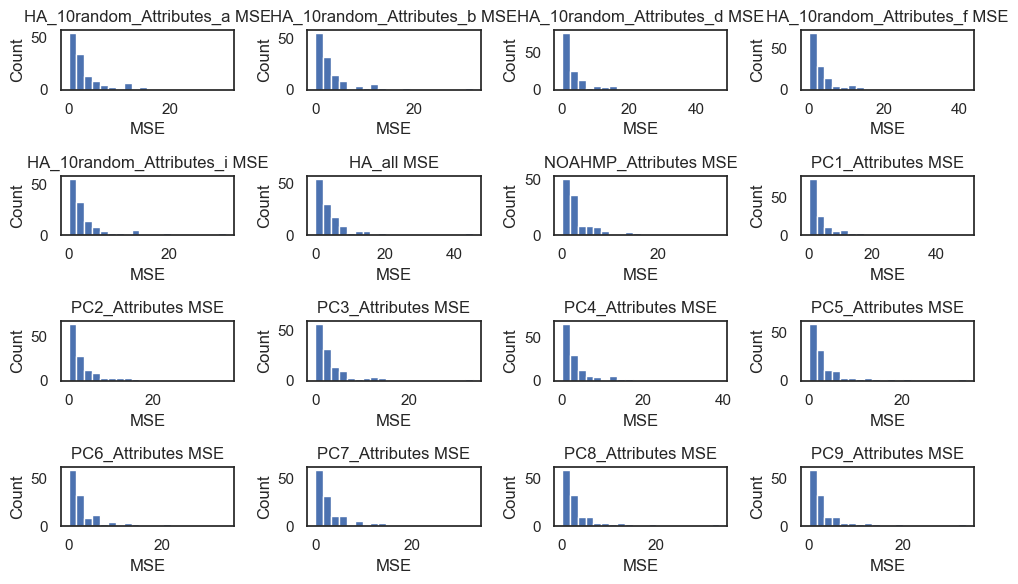

In [66]:
# Make a series of histograms in subplots for each dataframe
print(len(dataframes))
plt.figure(figsize=(10, 6))
for i, df in enumerate(dataframes):
    plt.subplot(4, 4, i + 1)
    plt.hist(df['MSE'], bins=20)
    plt.title(f'{dataframe_names[i]} MSE')
    plt.xlabel('MSE')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()



